In [2]:
import healpy as hp 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import rcParams
%config InlineBackend.figure_format = "retina"

rcParams["figure.figsize"] = (6,4)
rcParams["text.usetex"] = True
rcParams["font.size"] = 18
rcParams["font.family"] = "stix"
rcParams["figure.dpi"]= 150

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

#import logging 
#logging.basicConfig(level=logging.FATAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import AstroPaint

In [3]:
import astropaint as ap
from astropaint import Catalog, Canvas, Painter
from astropaint.lib import profile


# Catalog

The `Catalog` object reads/simulates a halo catalog. The initial catalog must contain the following columns: 

`x` , `y`, `z`, `v_x`, `v_y`, `v_z`, `M_200c`

Instantiating the class without any input will simulate a set of randomly distributed halos

In [4]:
catalog = Catalog()

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


Extra parameters such as halo radius, distance, etc. can be build using the `.build_dataframe()` method which runs automatically when the catalog data are updated.  

The data frame is stored in the `.data` attribute. 

In [5]:
catalog.data.head()

x          y          z        v_x        v_y        v_z  \
0   8.608226  -2.098330 -21.919329 -99.272634  34.565797 -57.294119   
1 -12.735861   4.991073 -16.611498  42.196862 -93.154267  64.111563   
2 -22.991721  -2.291792  -3.850017  62.959852  -7.791902 -13.206158   
3   9.380442  -1.477877   9.841328  88.928462 -63.319491  -0.048990   
4  18.144678 -17.081997  15.595518  47.914120  28.238271 -10.196238   

         M_200c        D_c        lat         lon  ...    R_200c    c_200c  \
0  1.331185e+14  23.642367 -67.990349  346.300811  ...  1.076555  3.946325   
1  3.547710e+14  21.518709 -50.529868  158.600220  ...  1.492587  3.588385   
2  3.669643e+14  23.424222  -9.460086  185.692384  ...  1.509494  3.576642   
3  4.429650e+14  13.675838  46.022641  351.046716  ...  1.607237  3.511933   
4  1.315942e+14  29.398030  32.038931  316.727913  ...  1.072431  3.950736   

    R_th_200c         rho_s       R_s        v_r        v_th       v_ph  \
0  156.537834  1.628943e+14  0.272799  13.905416  118.480608  10.072304   
1  238.449975  1.322706e+14  0.415949 -96.071852   15.812595  71.335448   
2  221.533900  1.313311e+14  0.422042 -58.864453   23.196614  13.998308   
3  404.017295  1.262269e+14  0.457650  67.804589   70.339807 -48.708121   
4  125.407880  1.632961e+14  0.271451   7.755778   16.881971  53.403868   

        v_lat      v_lon  
0 -118.480608  10.072304  
1  -15.812595  71.335448  
2  -23.196614  13.998308  
3  -70.339807 -48.708121  
4  -16.881971  53.403868  

[5 rows x 23 columns]

In [6]:
catalog.data.columns

Index(['x', 'y', 'z', 'v_x', 'v_y', 'v_z', 'M_200c', 'D_c', 'lat', 'lon',
       'theta', 'phi', 'D_a', 'R_200c', 'c_200c', 'R_th_200c', 'rho_s', 'R_s',
       'v_r', 'v_th', 'v_ph', 'v_lat', 'v_lon'],
      dtype='object')

new random catalogs can be created using the `generate_random_shell()` or `generate_random_box()` methods to  distribute halos uniformly over a shell or in a cubic box. 

In [7]:
catalog.generate_random_shell(n_tot=1000,
                              shell_radius=30,
                              mass_min=1E14,
                              mass_max=1E15,)
                            

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [8]:
catalog.data.head()

x          y          z        v_x        v_y        v_z  \
0  -9.088094   9.102729  27.102525  35.952129 -19.347433  72.544818   
1  22.624983 -19.254781  -4.166958  50.280440  23.232317  44.585466   
2  -4.097283  -0.984097  29.702590  49.419772 -80.923572  67.760943   
3 -28.035236  10.477647   2.060207 -60.483208  89.729176 -24.450052   
4  10.992232  -6.559728  27.131915 -50.876629 -53.053148 -21.238529   

         M_200c   D_c        lat         lon  ...    R_200c    c_200c  \
0  1.129455e+14  30.0  64.610985  134.953903  ...  1.019170  4.009736   
1  1.556301e+14  30.0  -7.984118  319.600864  ...  1.134109  3.886968   
2  6.602331e+14  30.0  81.925520  193.505635  ...  1.835930  3.378574   
3  4.813338e+14  30.0   3.937805  159.507707  ...  1.652364  3.483748   
4  4.694562e+14  30.0  64.742214  329.172924  ...  1.638659  3.492202   

    R_th_200c         rho_s       R_s        v_r       v_th       v_ph  \
0  116.788254  1.687286e+14  0.254174  48.776567 -66.421971 -11.772749   
1  129.959303  1.575459e+14  0.291772  16.815838 -47.380439  50.279703   
2  210.382025  1.160925e+14  0.543404  62.994177 -38.382888  90.227332   
3  189.346954  1.240420e+14  0.474306  86.181316  30.440295 -62.877004   
4  187.776487  1.246949e+14  0.469234 -26.249182  -5.861744 -71.629347   

       v_lat      v_lon  
0  66.421971 -11.772749  
1  47.380439  50.279703  
2  38.382888  90.227332  
3 -30.440295 -62.877004  
4   5.861744 -71.629347  

[5 rows x 23 columns]

Let's checkout the 2D projection of the catalog in the $x$-$y$ plane.

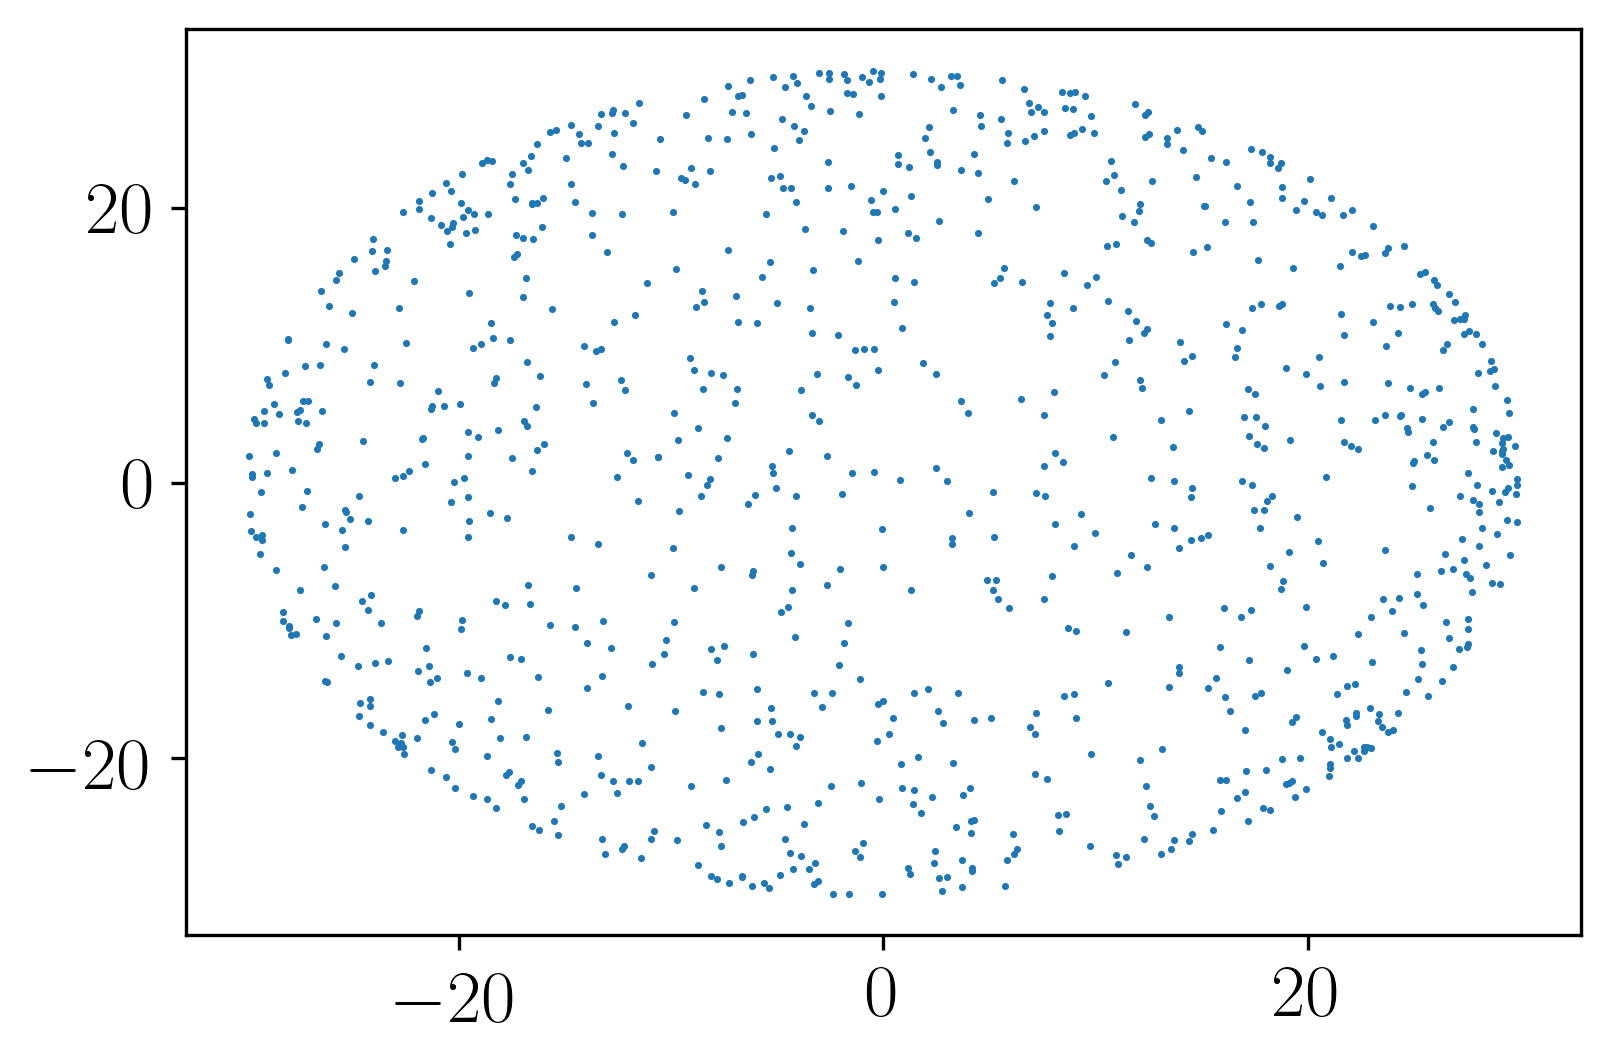

In [9]:
plt.scatter(catalog.data.x, catalog.data.y, s=0.5)

Great! Now let's put these halos on a canvas.

# Canvas 

The `Canvas` object locates the halo centers and extents on a healpy map. We can initialize it by feeding in a `Catalog` object and an `nside` for the map. 

In [11]:
canvas = Canvas(catalog,
                nside=256,
                R_times=1,
               )

Let's check out the locations of the halos with a scatter plot

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


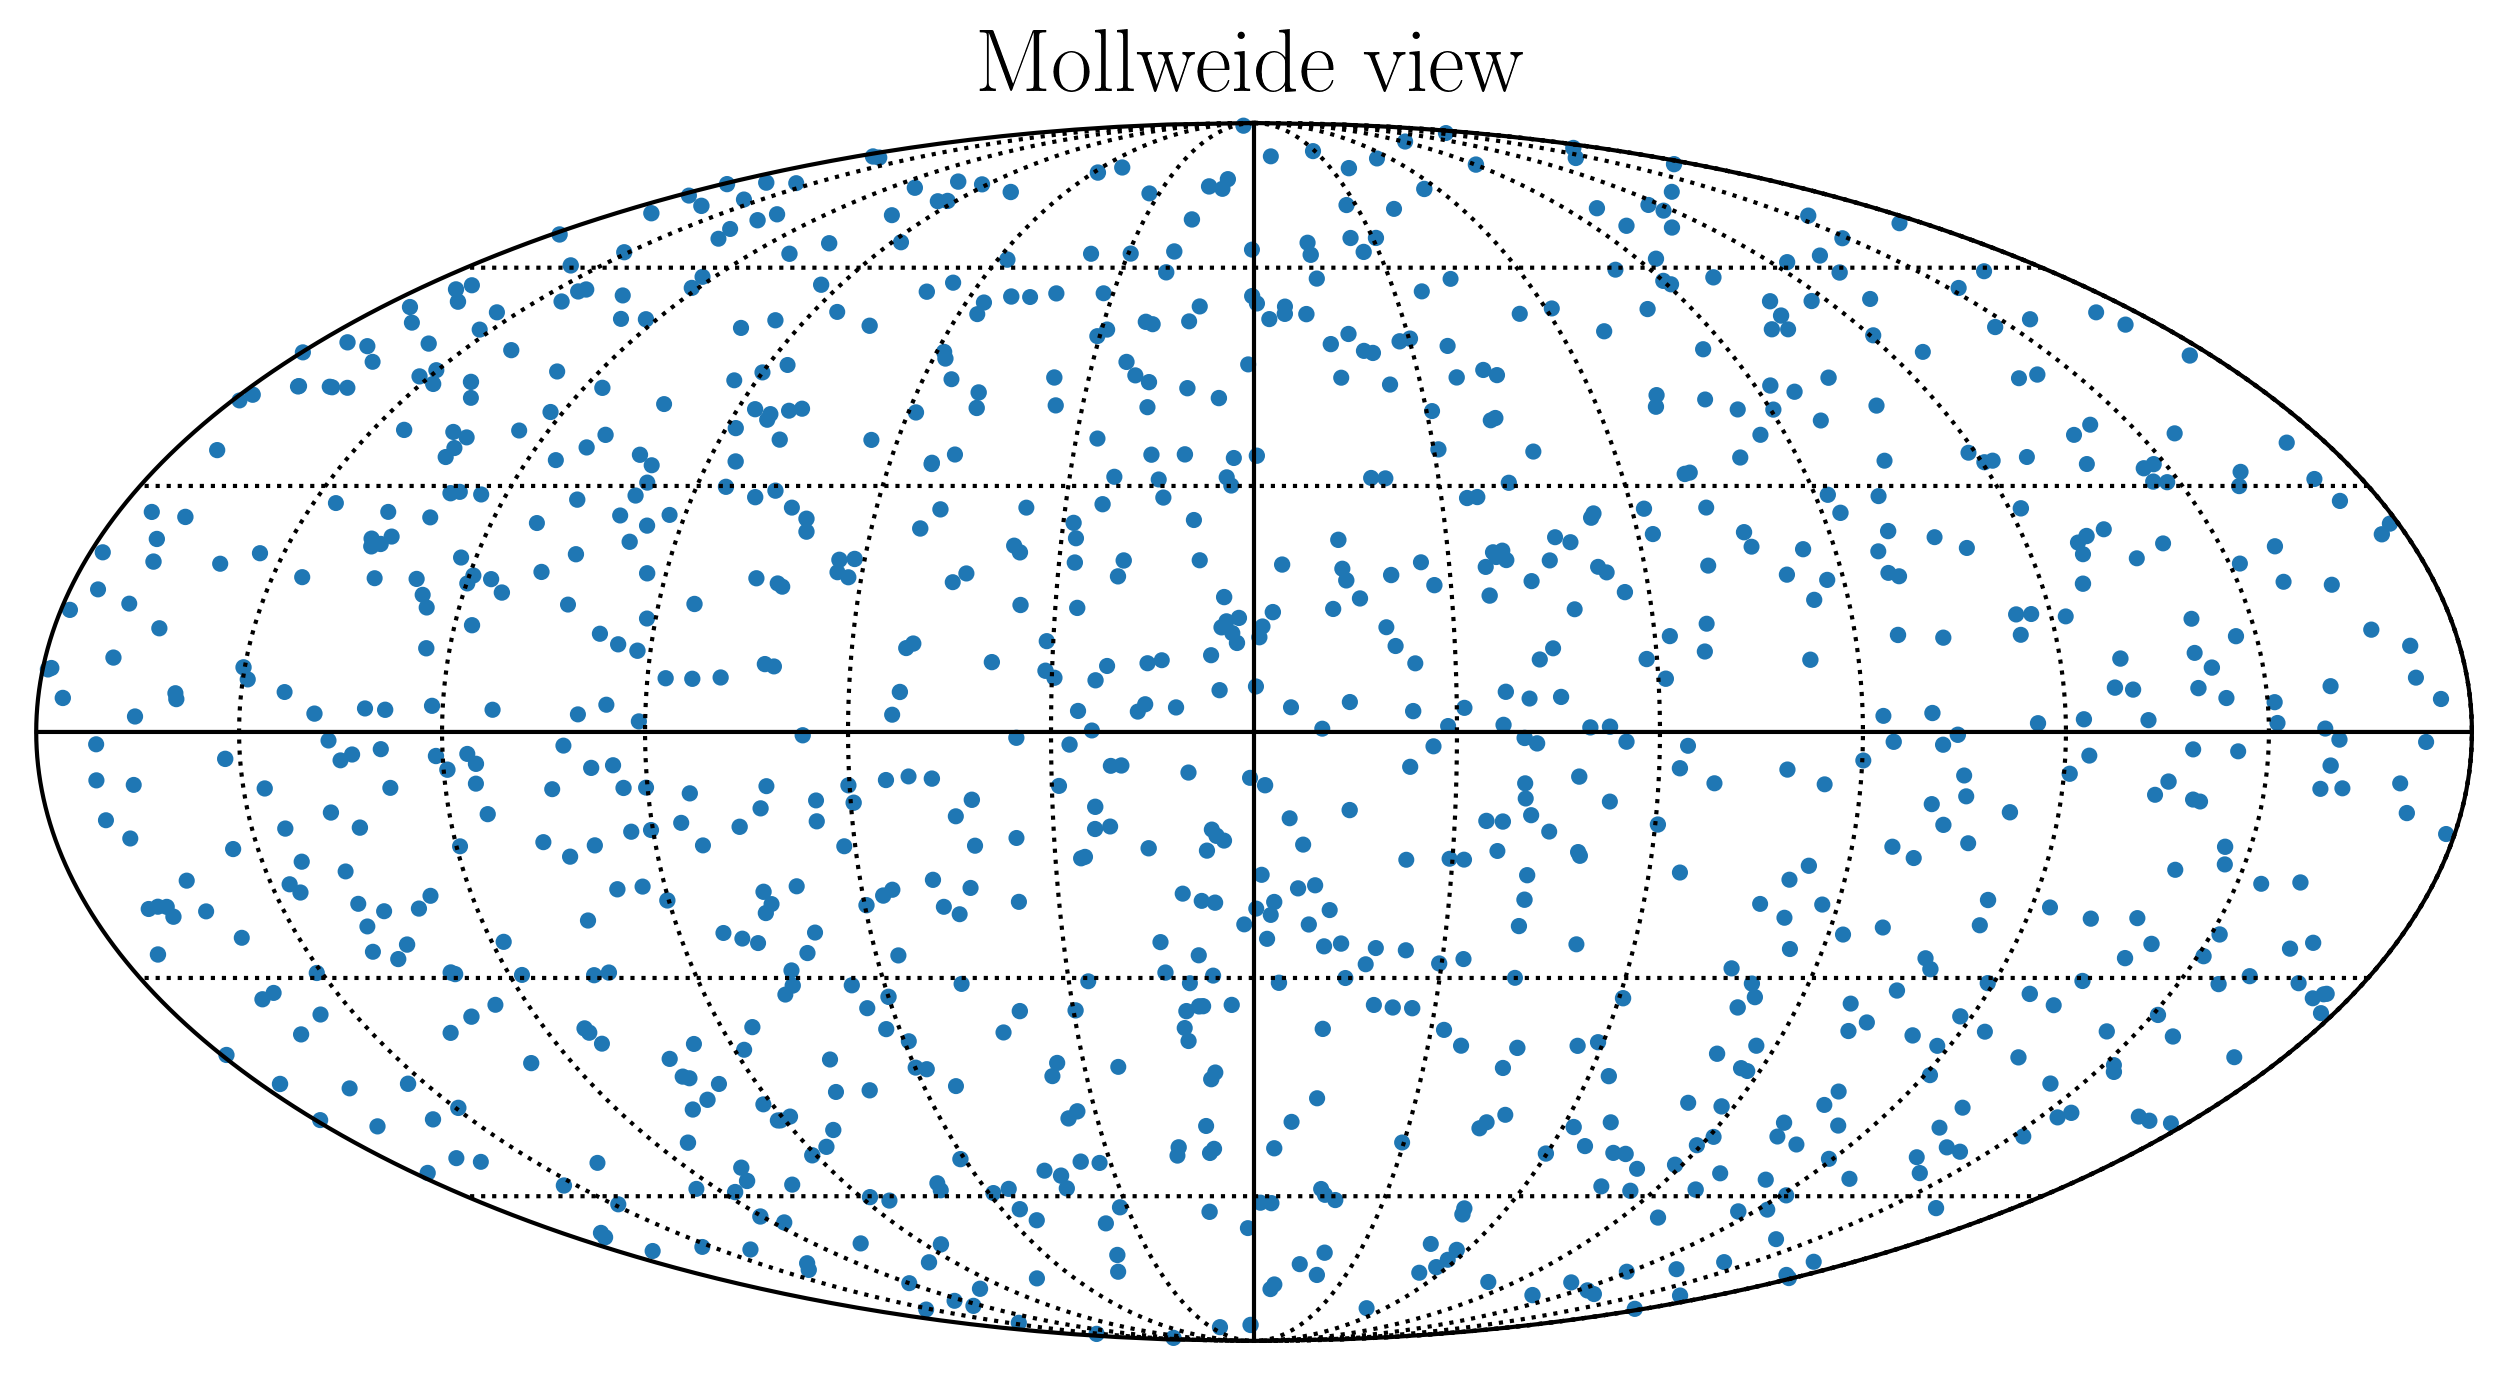

In [12]:
canvas.show_halo_centers("mollview",
                        marker='.',
                        )

and in cartesian projection

0.0 135.5224878140701 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


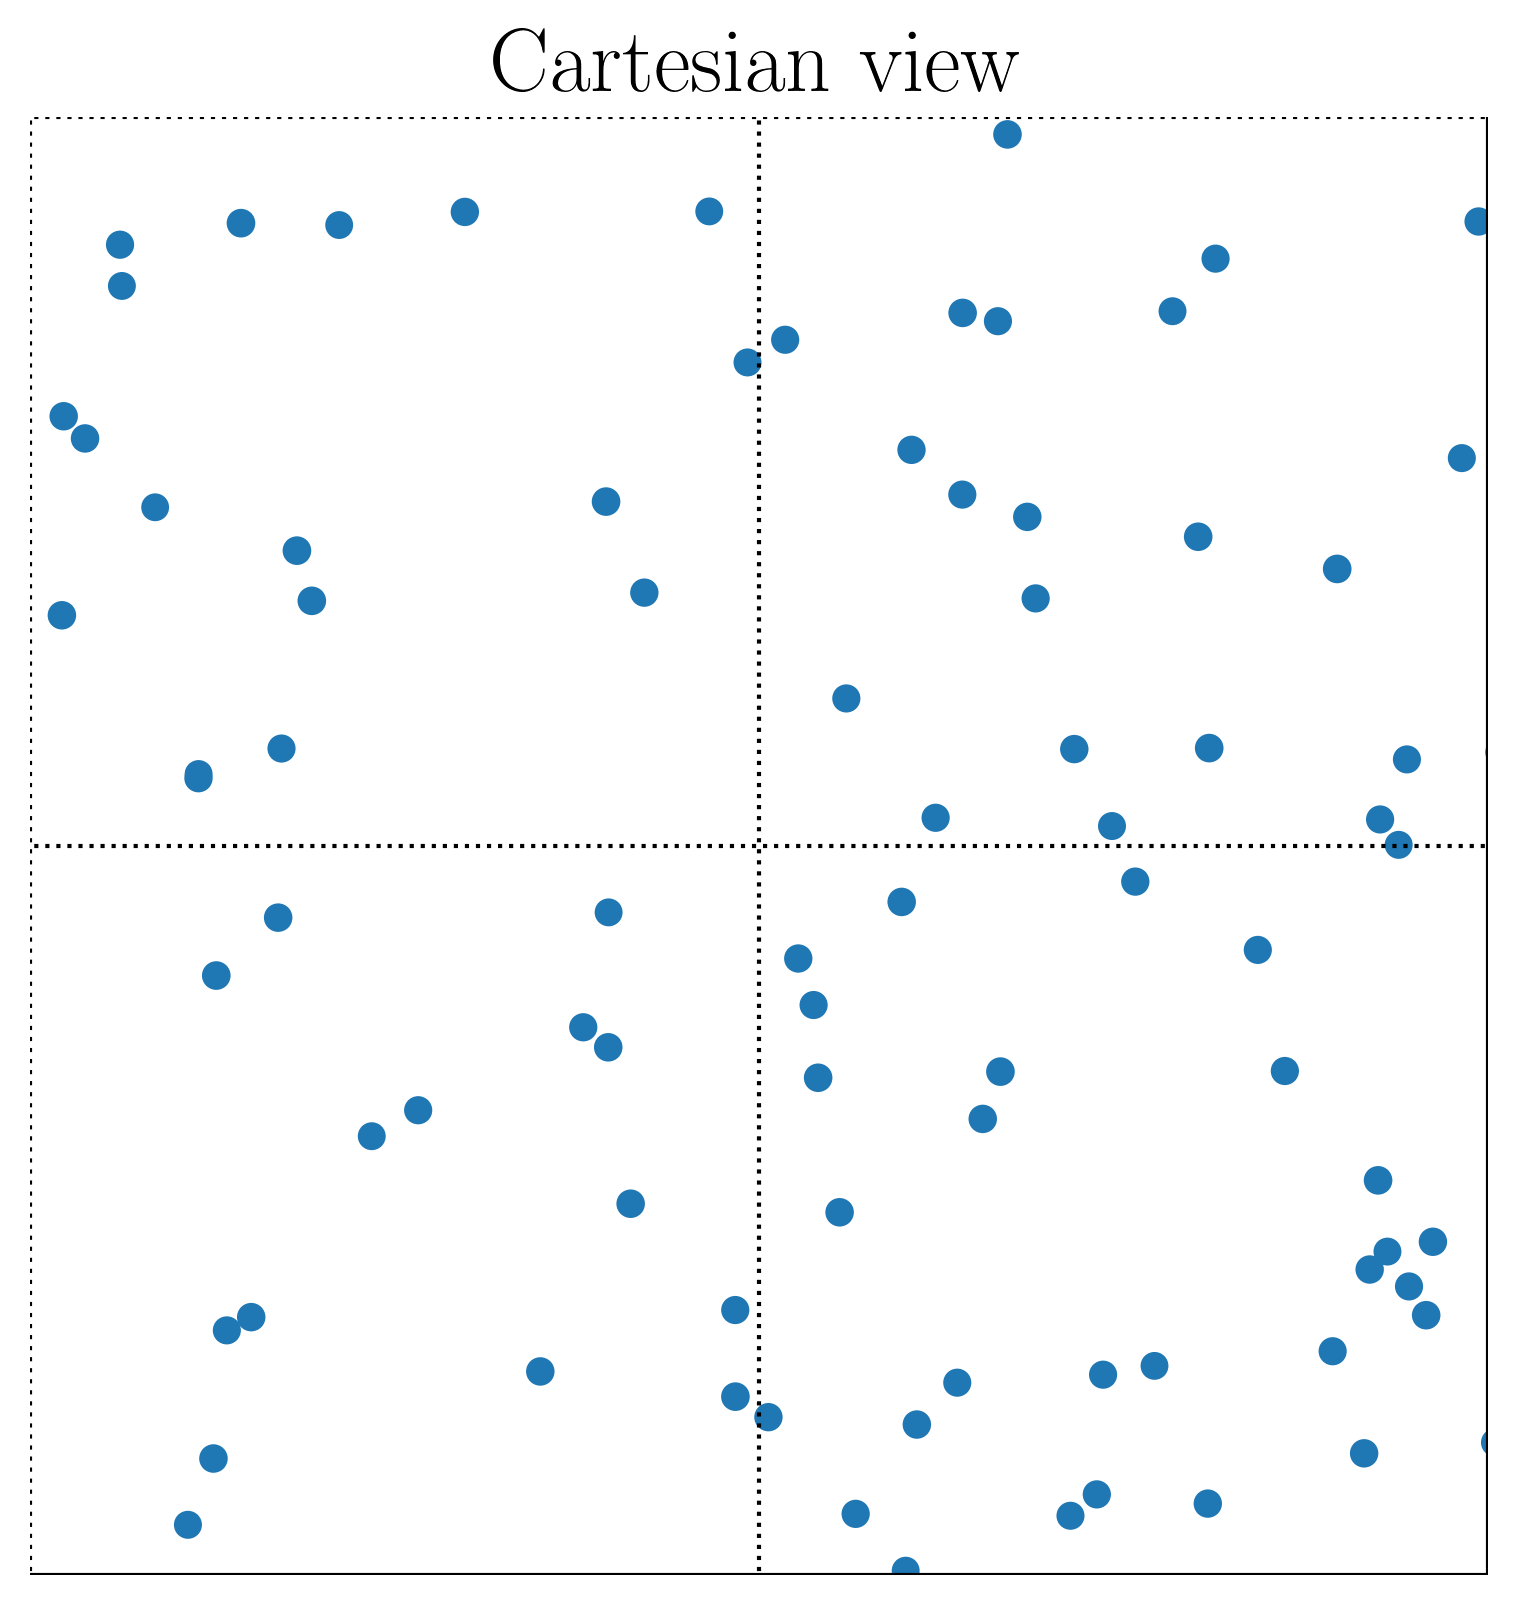

In [13]:
canvas.show_halo_centers("cartview",
                        lonra=[0,60],
                        latra=[0,60],
                        )

The canvas provides methods for carving discs around halo centers. These methods can be accessed through the `discs` inner class. The radii of the discs are set by the parameter `R_times` passed to the canvas upon instantiation. 

Let's check out the discs

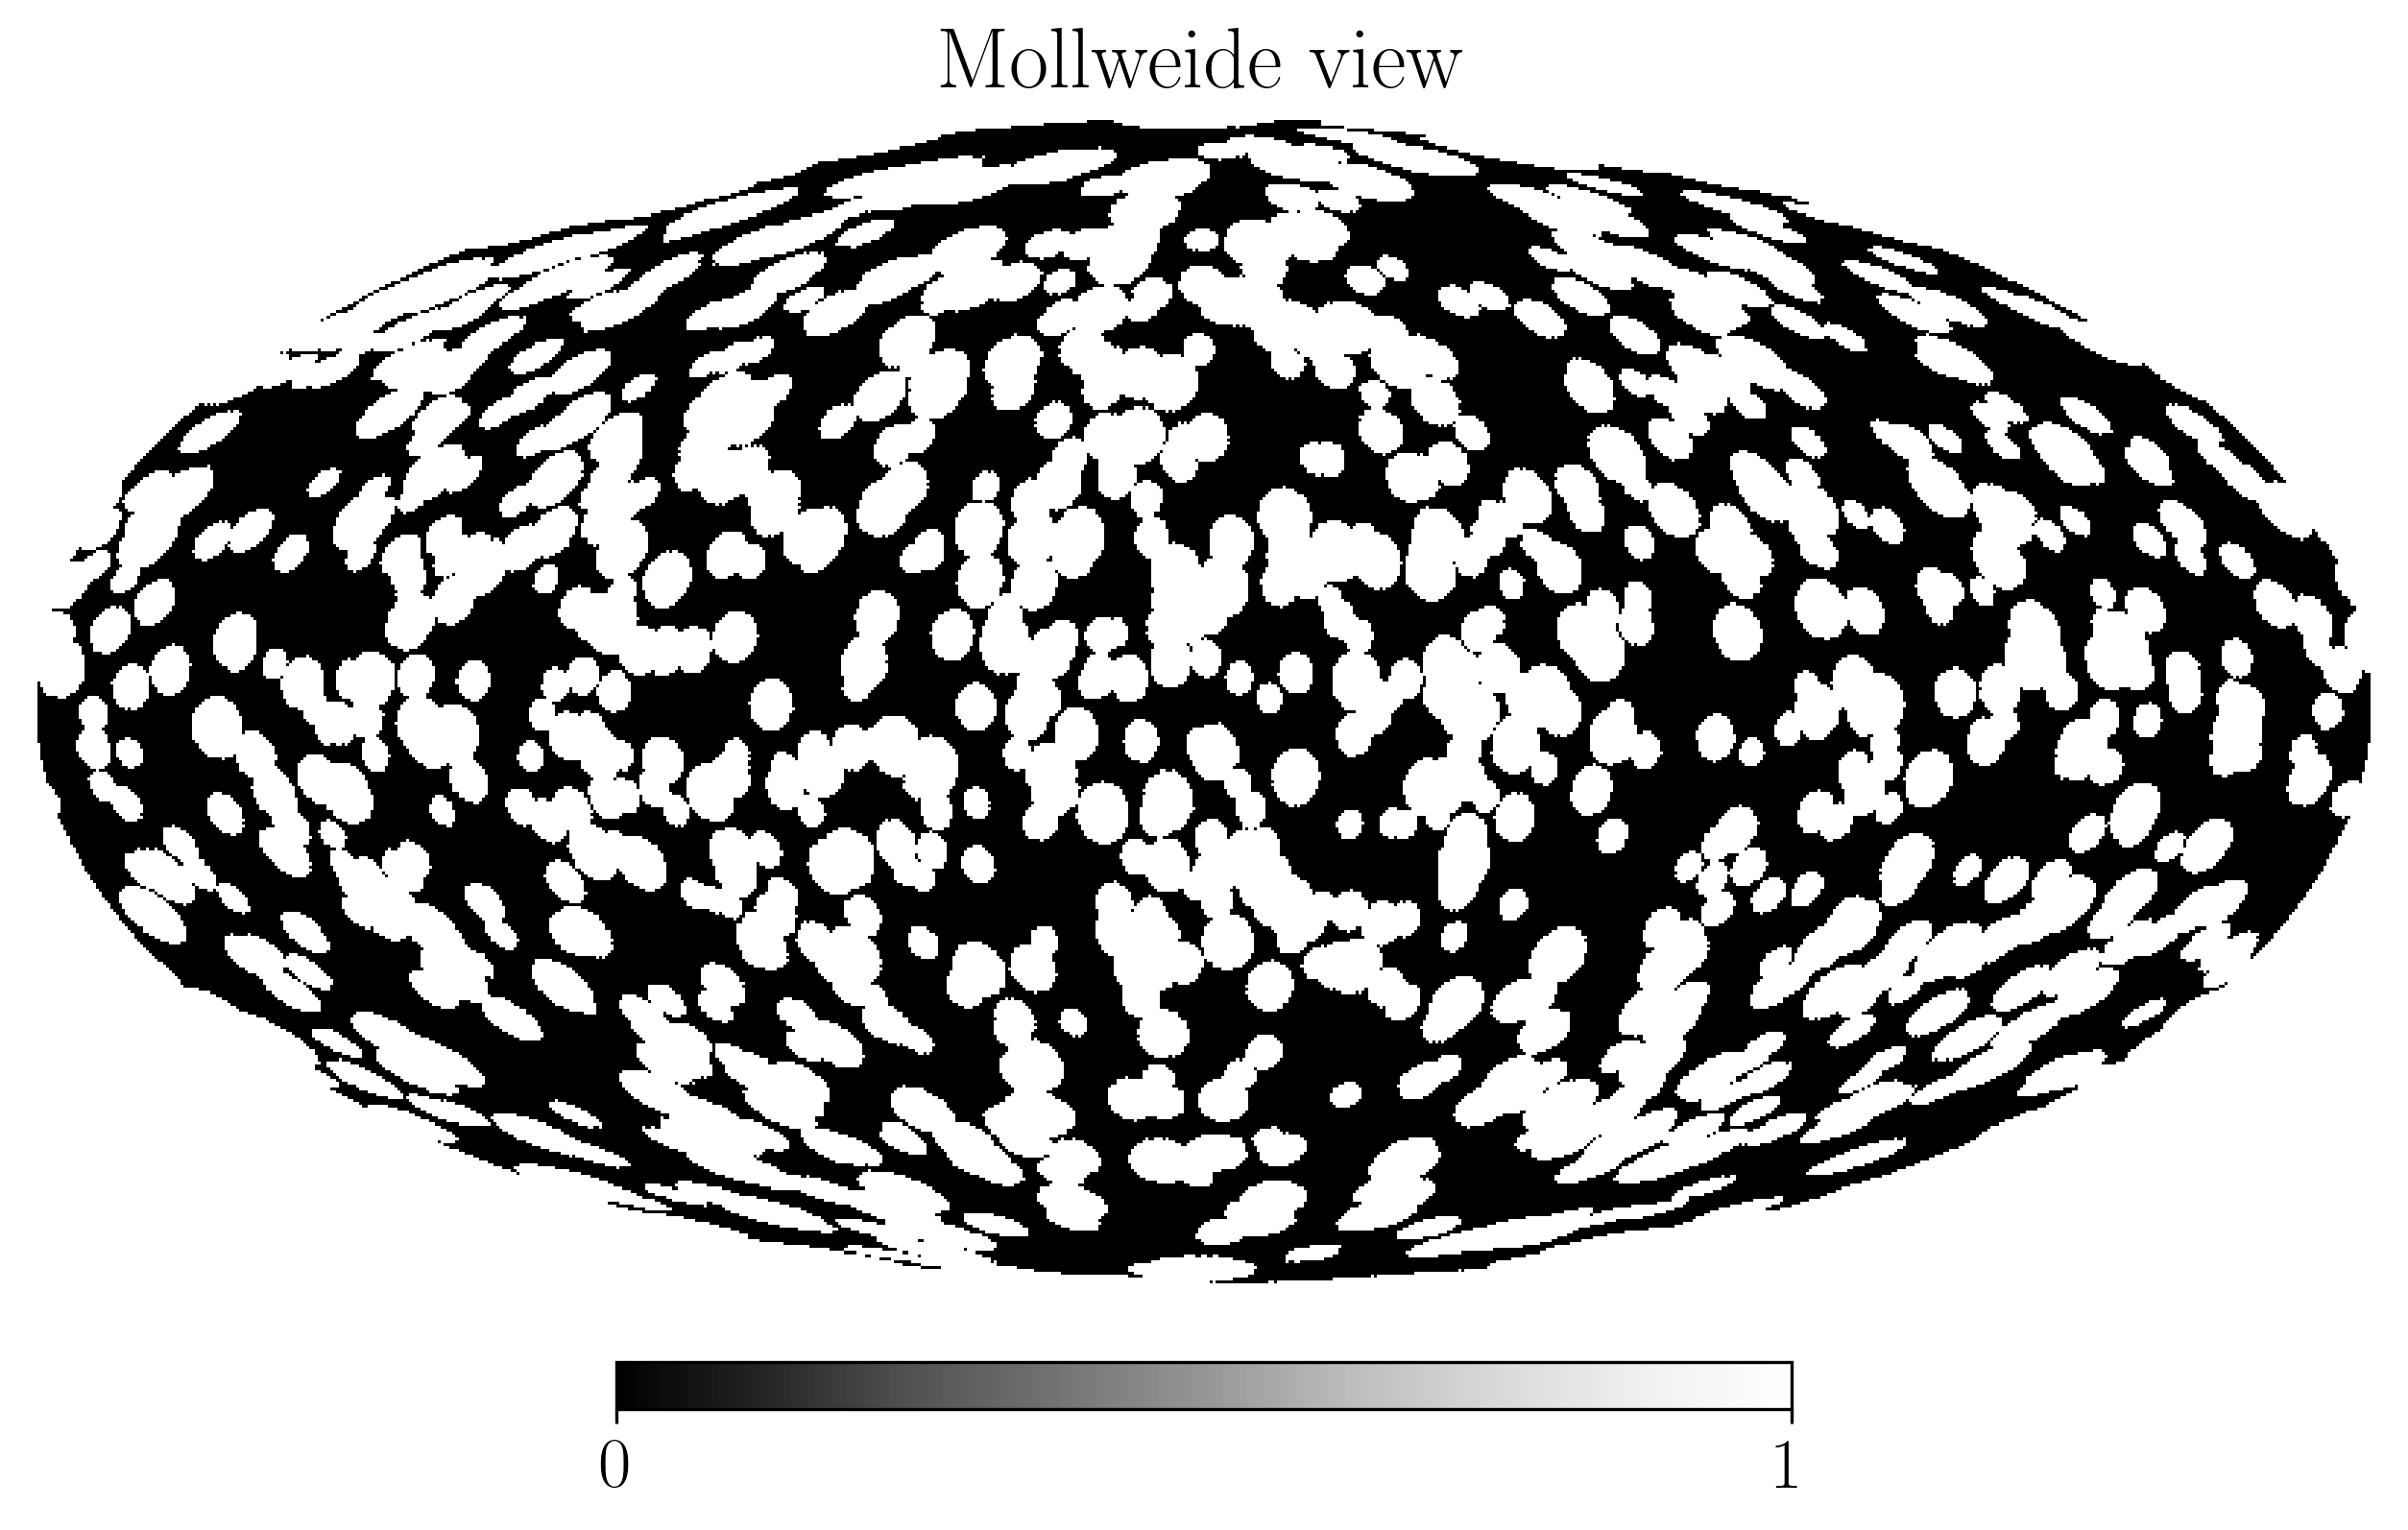

In [14]:
canvas.cmap = cm.Greys_r
canvas.show_discs()

# Painter

The `Painter` object paints a signal on top of the canvas according to an input template

In [15]:
painter = Painter(template=profile.solid_sphere_proj)

The template 'solid_sphere_proj' takes in the following arguments:
['r', 'M_200c', 'R_200c']



In [16]:
# change the color map to RdYlBu
canvas.cmap = cm.RdYlBu_r

If the canvas has been painted on previously, it can be cleaned using `.clean()`

In [17]:
canvas.clean()

The painter paints the signal on the canvas using the `.spray()` method

In [18]:
painter.spray(canvas, with_ray=False)

Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['M_200c', 'R_200c'], dtype='object')



Your artwork is finished. Check it out with Canvas.show_map()


If the keyword `with_ray` is `True` the painter paints the canvas in parallel using [Ray](https://ray.readthedocs.io/en/latest/index.html). This is only recommended for painting large catalogs (>100,000 halos). For small datasets the parallelization overhead will actually reduce performance. 

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


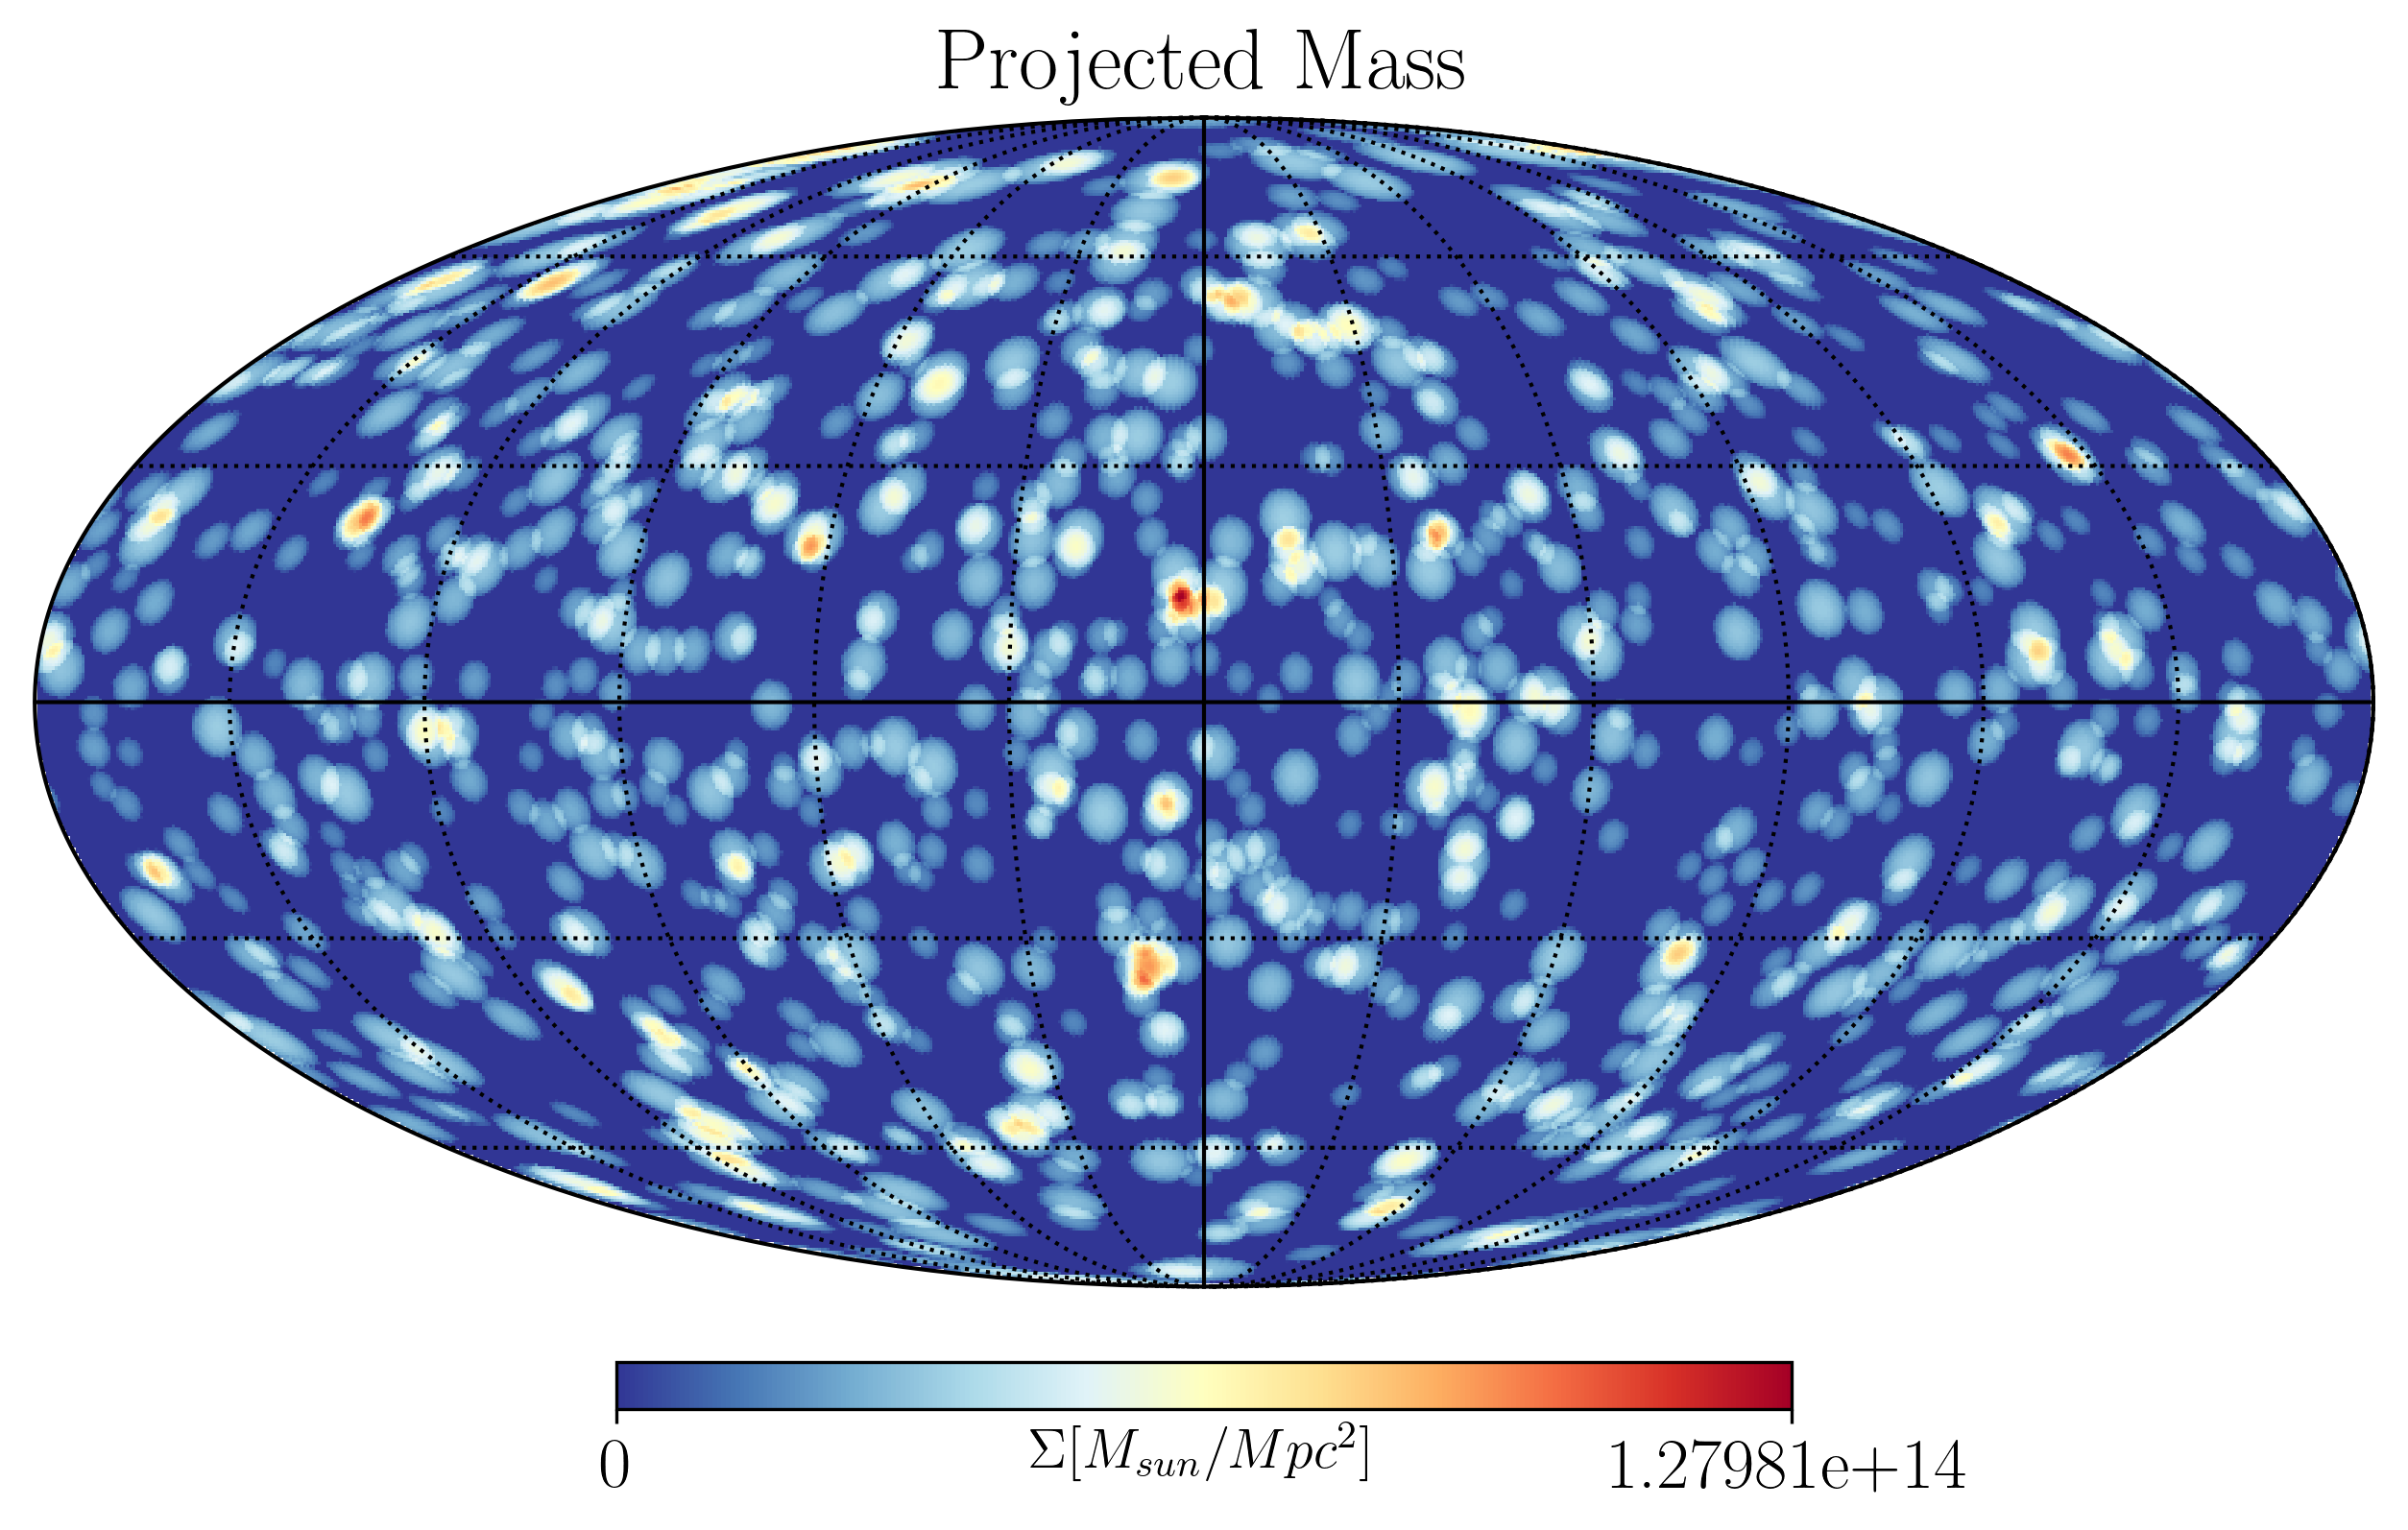

In [19]:
canvas.show_map(projection="mollview",
                title="Projected Mass",
                unit="$\Sigma [M_{sun}/Mpc^2$]")
hp.graticule()

33.59037789072914 116.40962210927087 -27.870395409510863 57.87039540951086
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


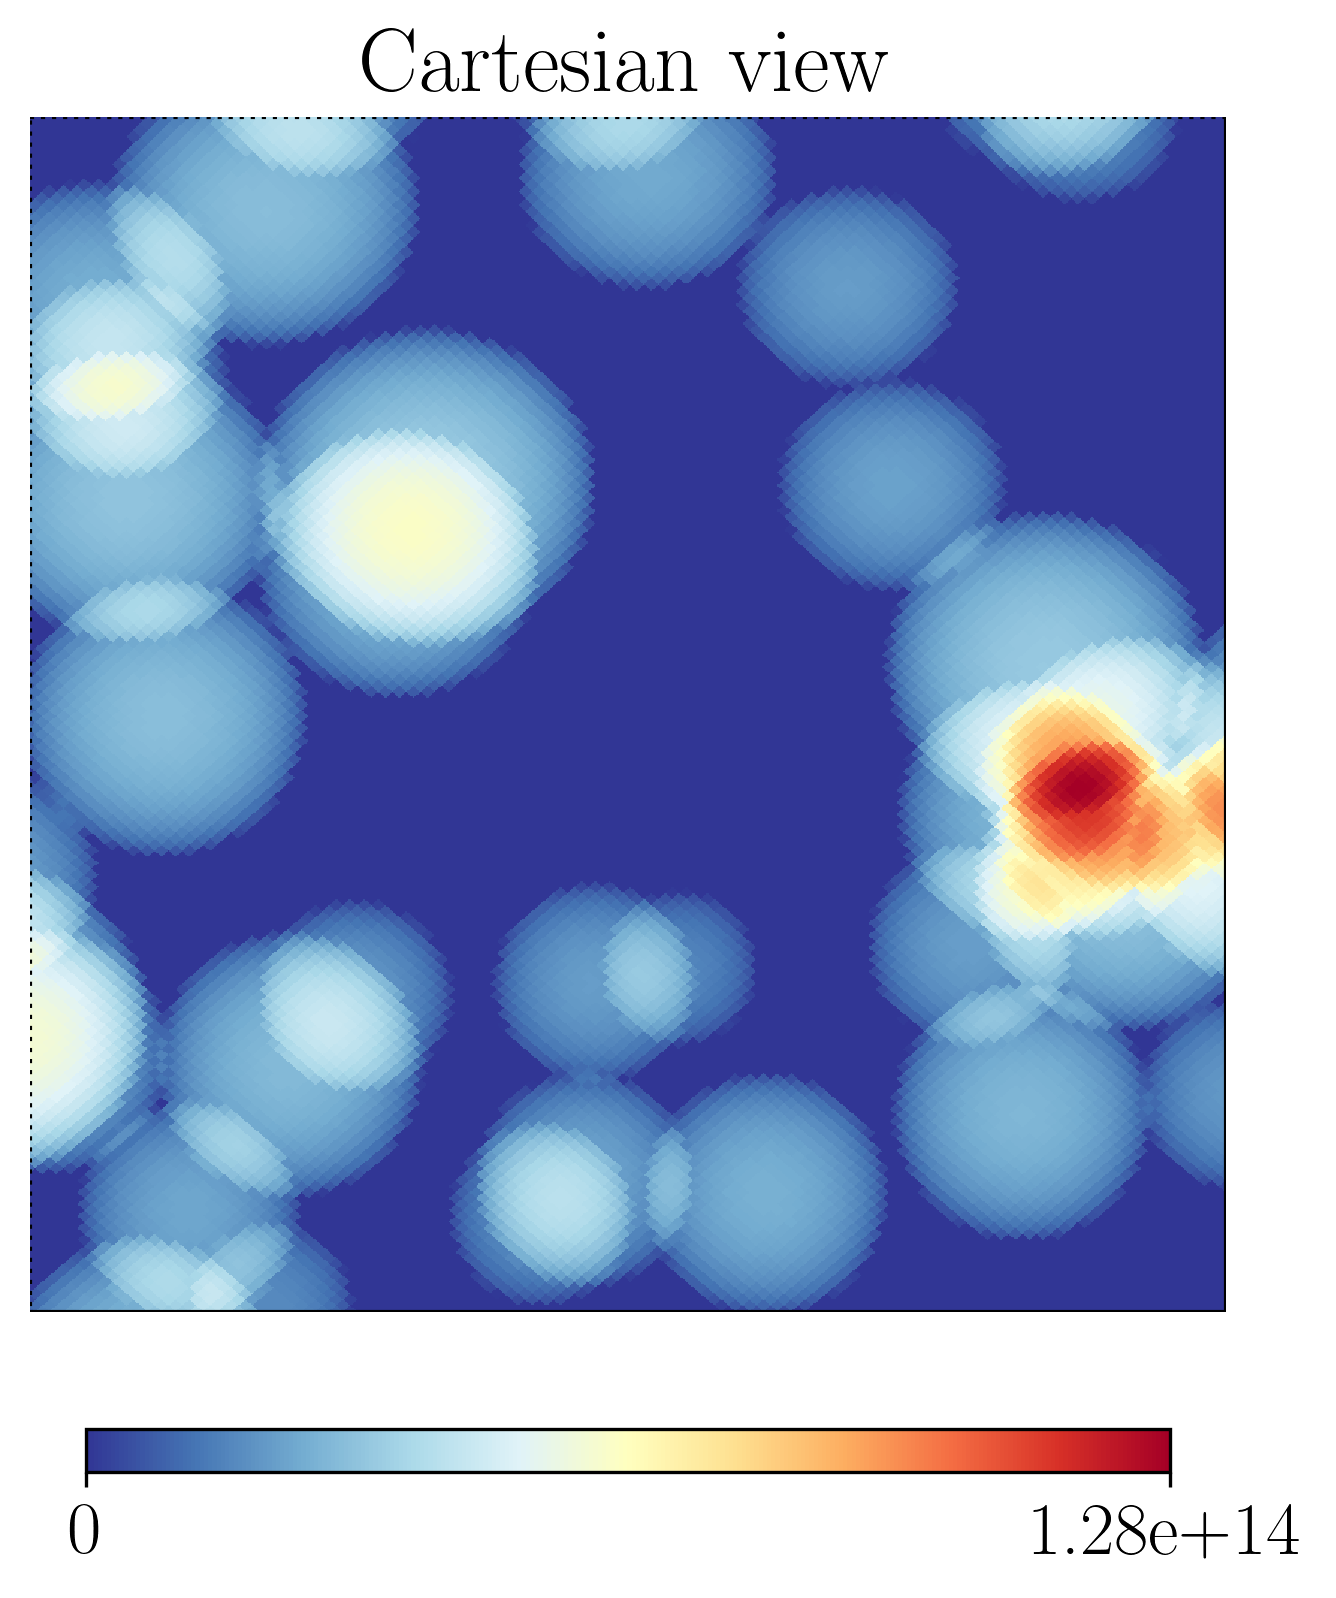

In [20]:
canvas.show_map(projection="cartview",
               lonra=[0,30],
               latra=[0,30])
hp.graticule()


The painter can take any arbitrary function that takes `r` as the first argument. To demonstrate this, let's define an absurd radial profile that oscilates as `sin(5*r/R_200c)` and is proportional to `M_200c`! 

In [21]:
def crazy_profile(r, R_200c, M_200c):
    
    return np.sin(4*r/R_200c)*M_200c

In [22]:
painter = Painter(crazy_profile)

The template 'crazy_profile' takes in the following arguments:
['r', 'R_200c', 'M_200c']



Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['M_200c', 'R_200c'], dtype='object')



Your artwork is finished. Check it out with Canvas.show_map()


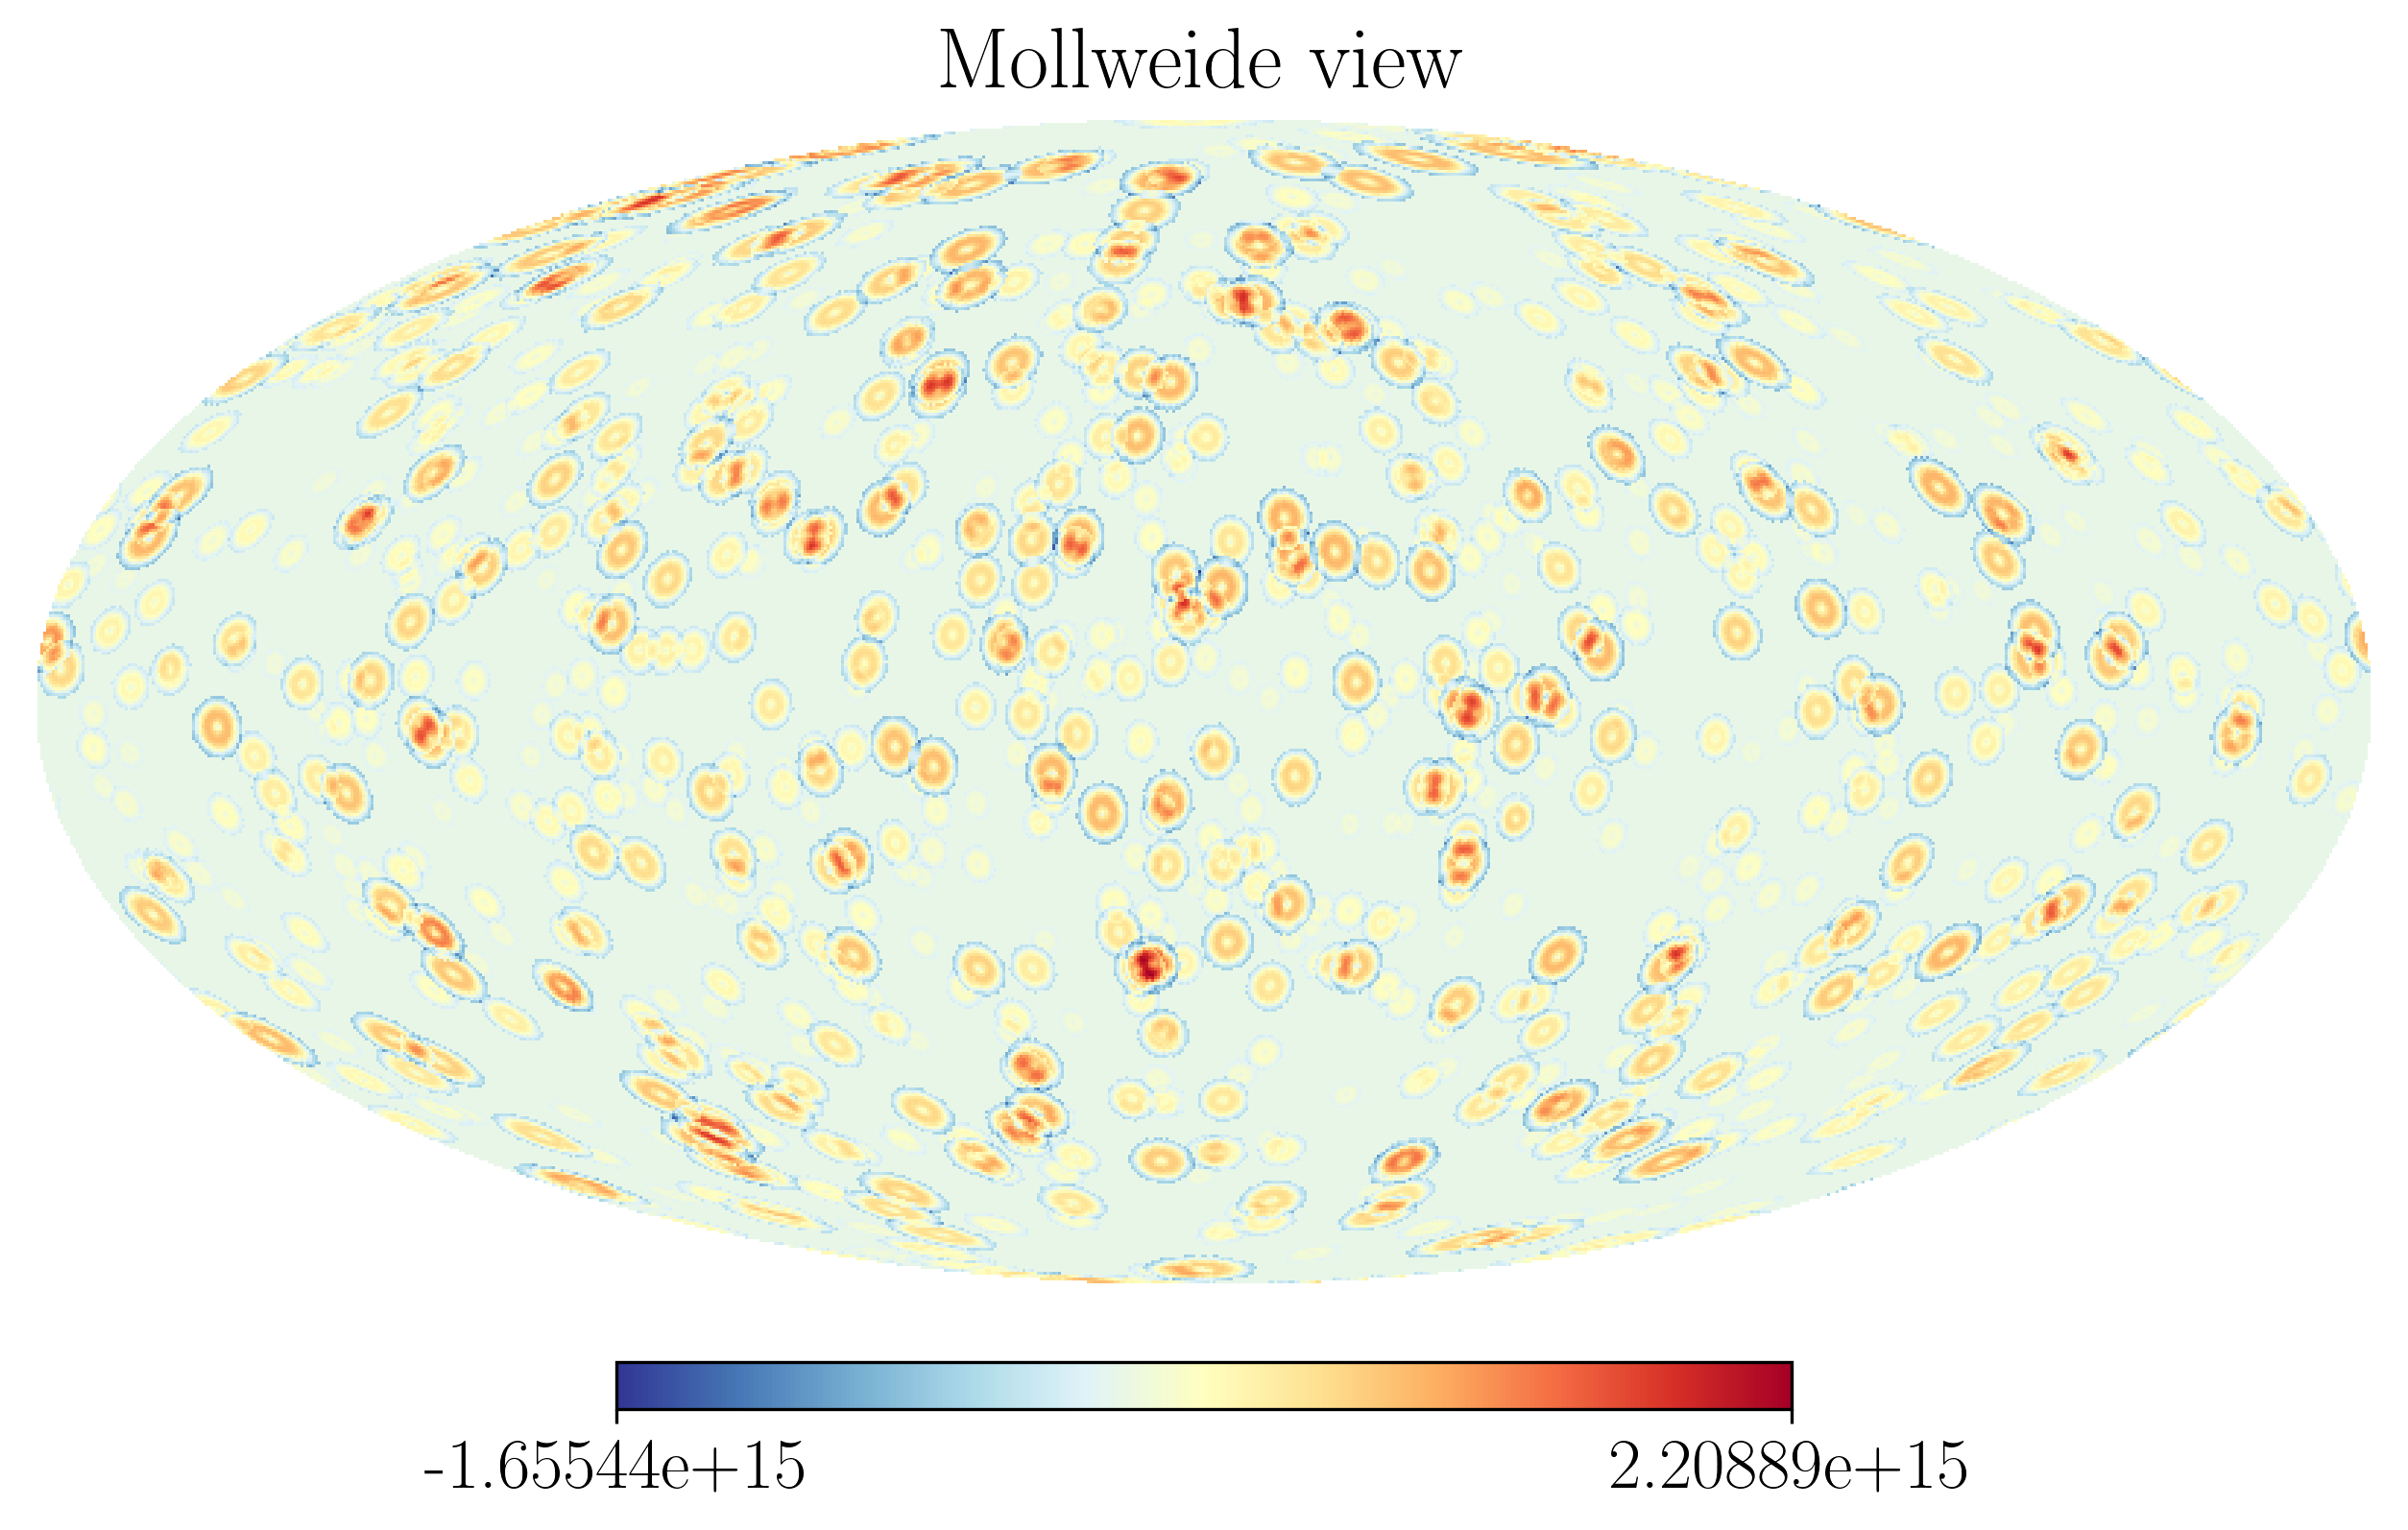

In [23]:
canvas.clean()
painter.spray(canvas, with_ray=False)
canvas.show_map()

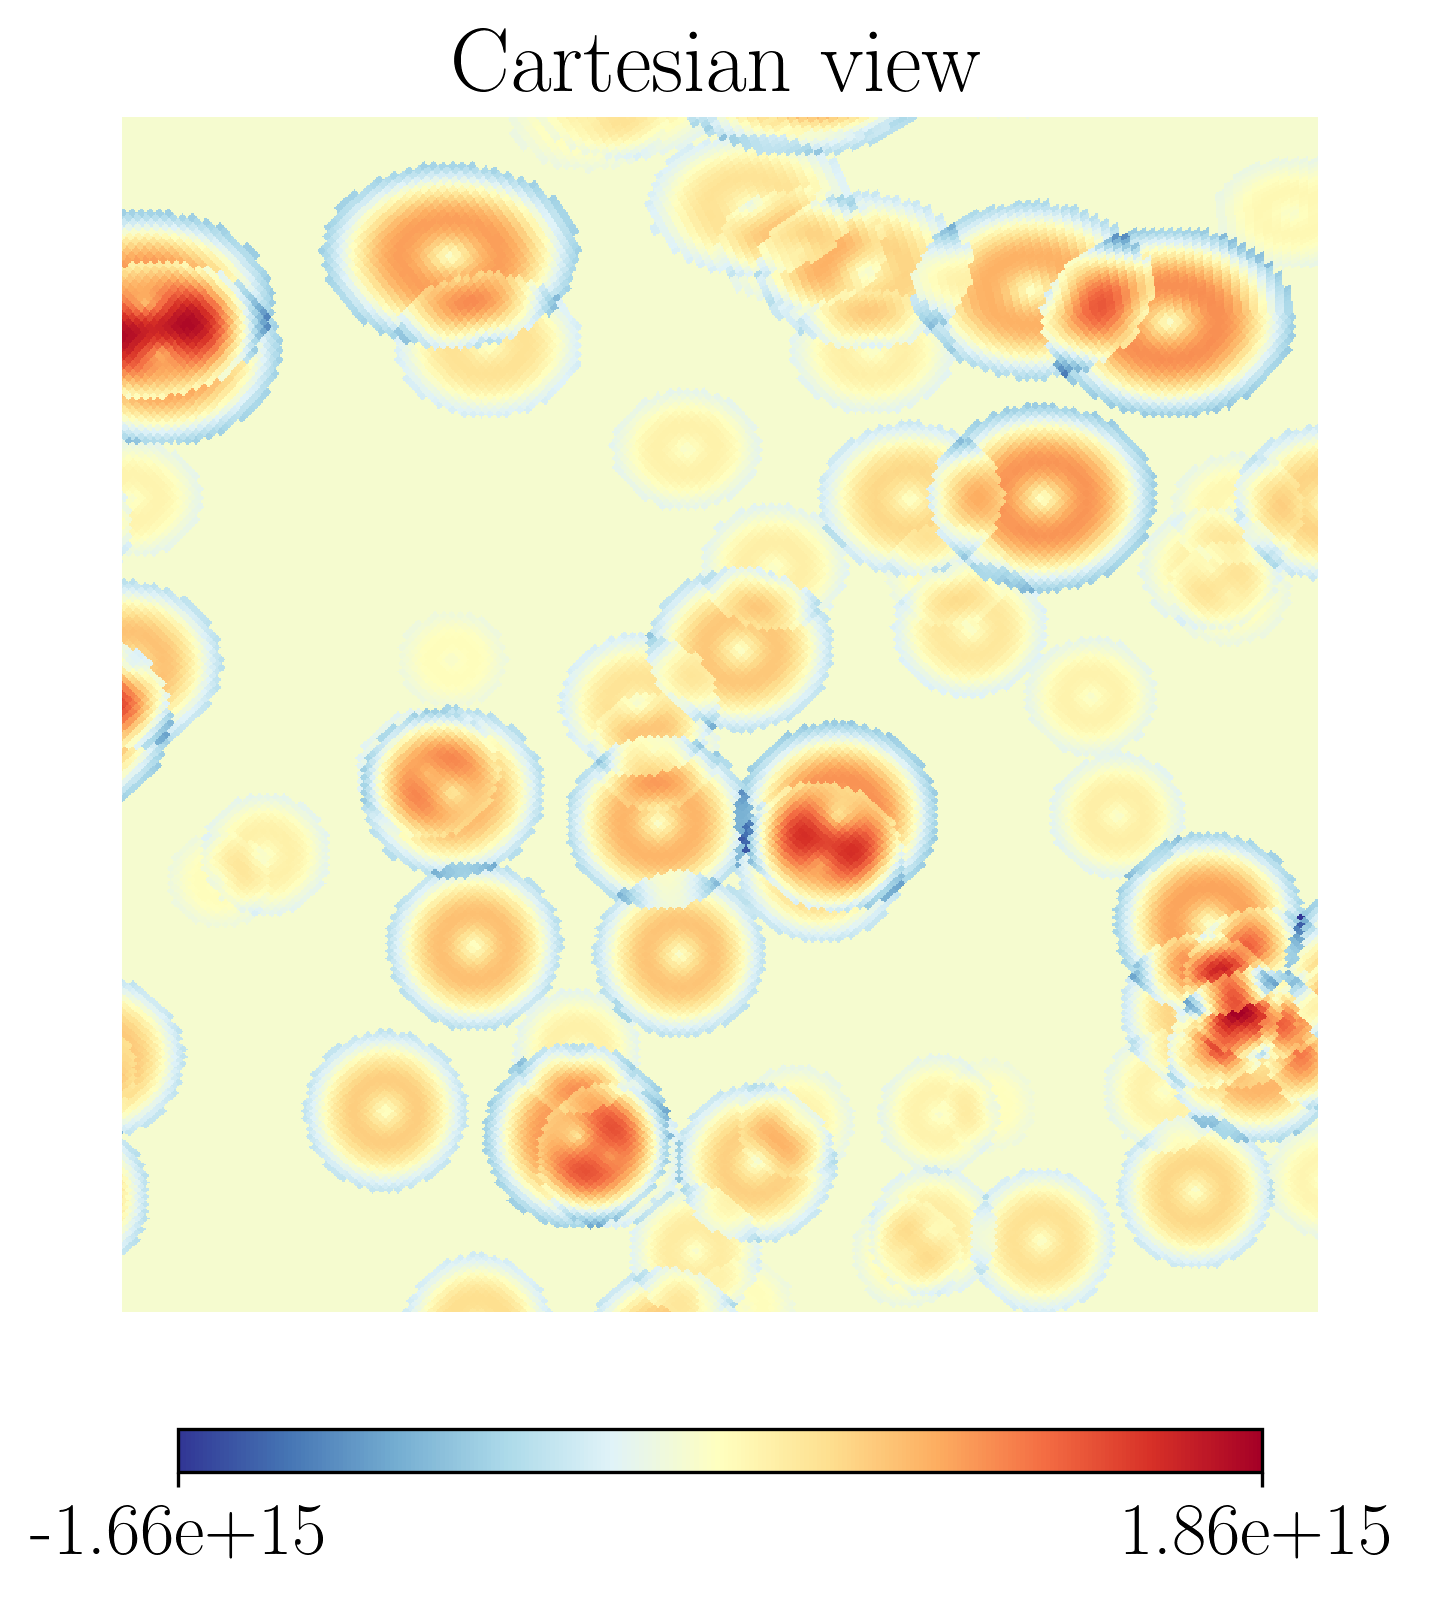

In [24]:
canvas.show_map("cartesian",
               lonra=[0,50],
               latra=[0,50])

Notice that we didn't have to define `R_200c` or `M_200c`! The painter looks up the function arguments in the catalog and uses them if they exist. 

# Stacking Cutouts 

Stacking cutouts with AstroPaint is very easy. 

In [25]:
catalog.generate_random_shell(n_tot=10,
                              shell_radius=20,
                              mass_min=1E14,
                              mass_max=1E15,)
                            
canvas = Canvas(catalog, nside=1024)   

painter = Painter(template=profile.constant_density)

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!
The template 'constant_density' takes in the following arguments:
['r', 'constant']



The template takes in an extra argument `constant` which does not appear in the catalog, so it has to be passed to the spray function.

In [26]:
painter.spray(canvas,
              constant=np.arange(1,catalog.size+1),
              with_ray=False)

Painting the canvas...
The following parameters were not found in the canvas.catalog.data
['constant']
Make sure you pass them as kwargs (key=value), dictionary (**dict), or Pandas DataFrame (**df) in the .spray method. Check the spray docstring(.spray.__doc__) for examples. 
spray_df.columns = Index(['constant'], dtype='object')



Your artwork is finished. Check it out with Canvas.show_map()


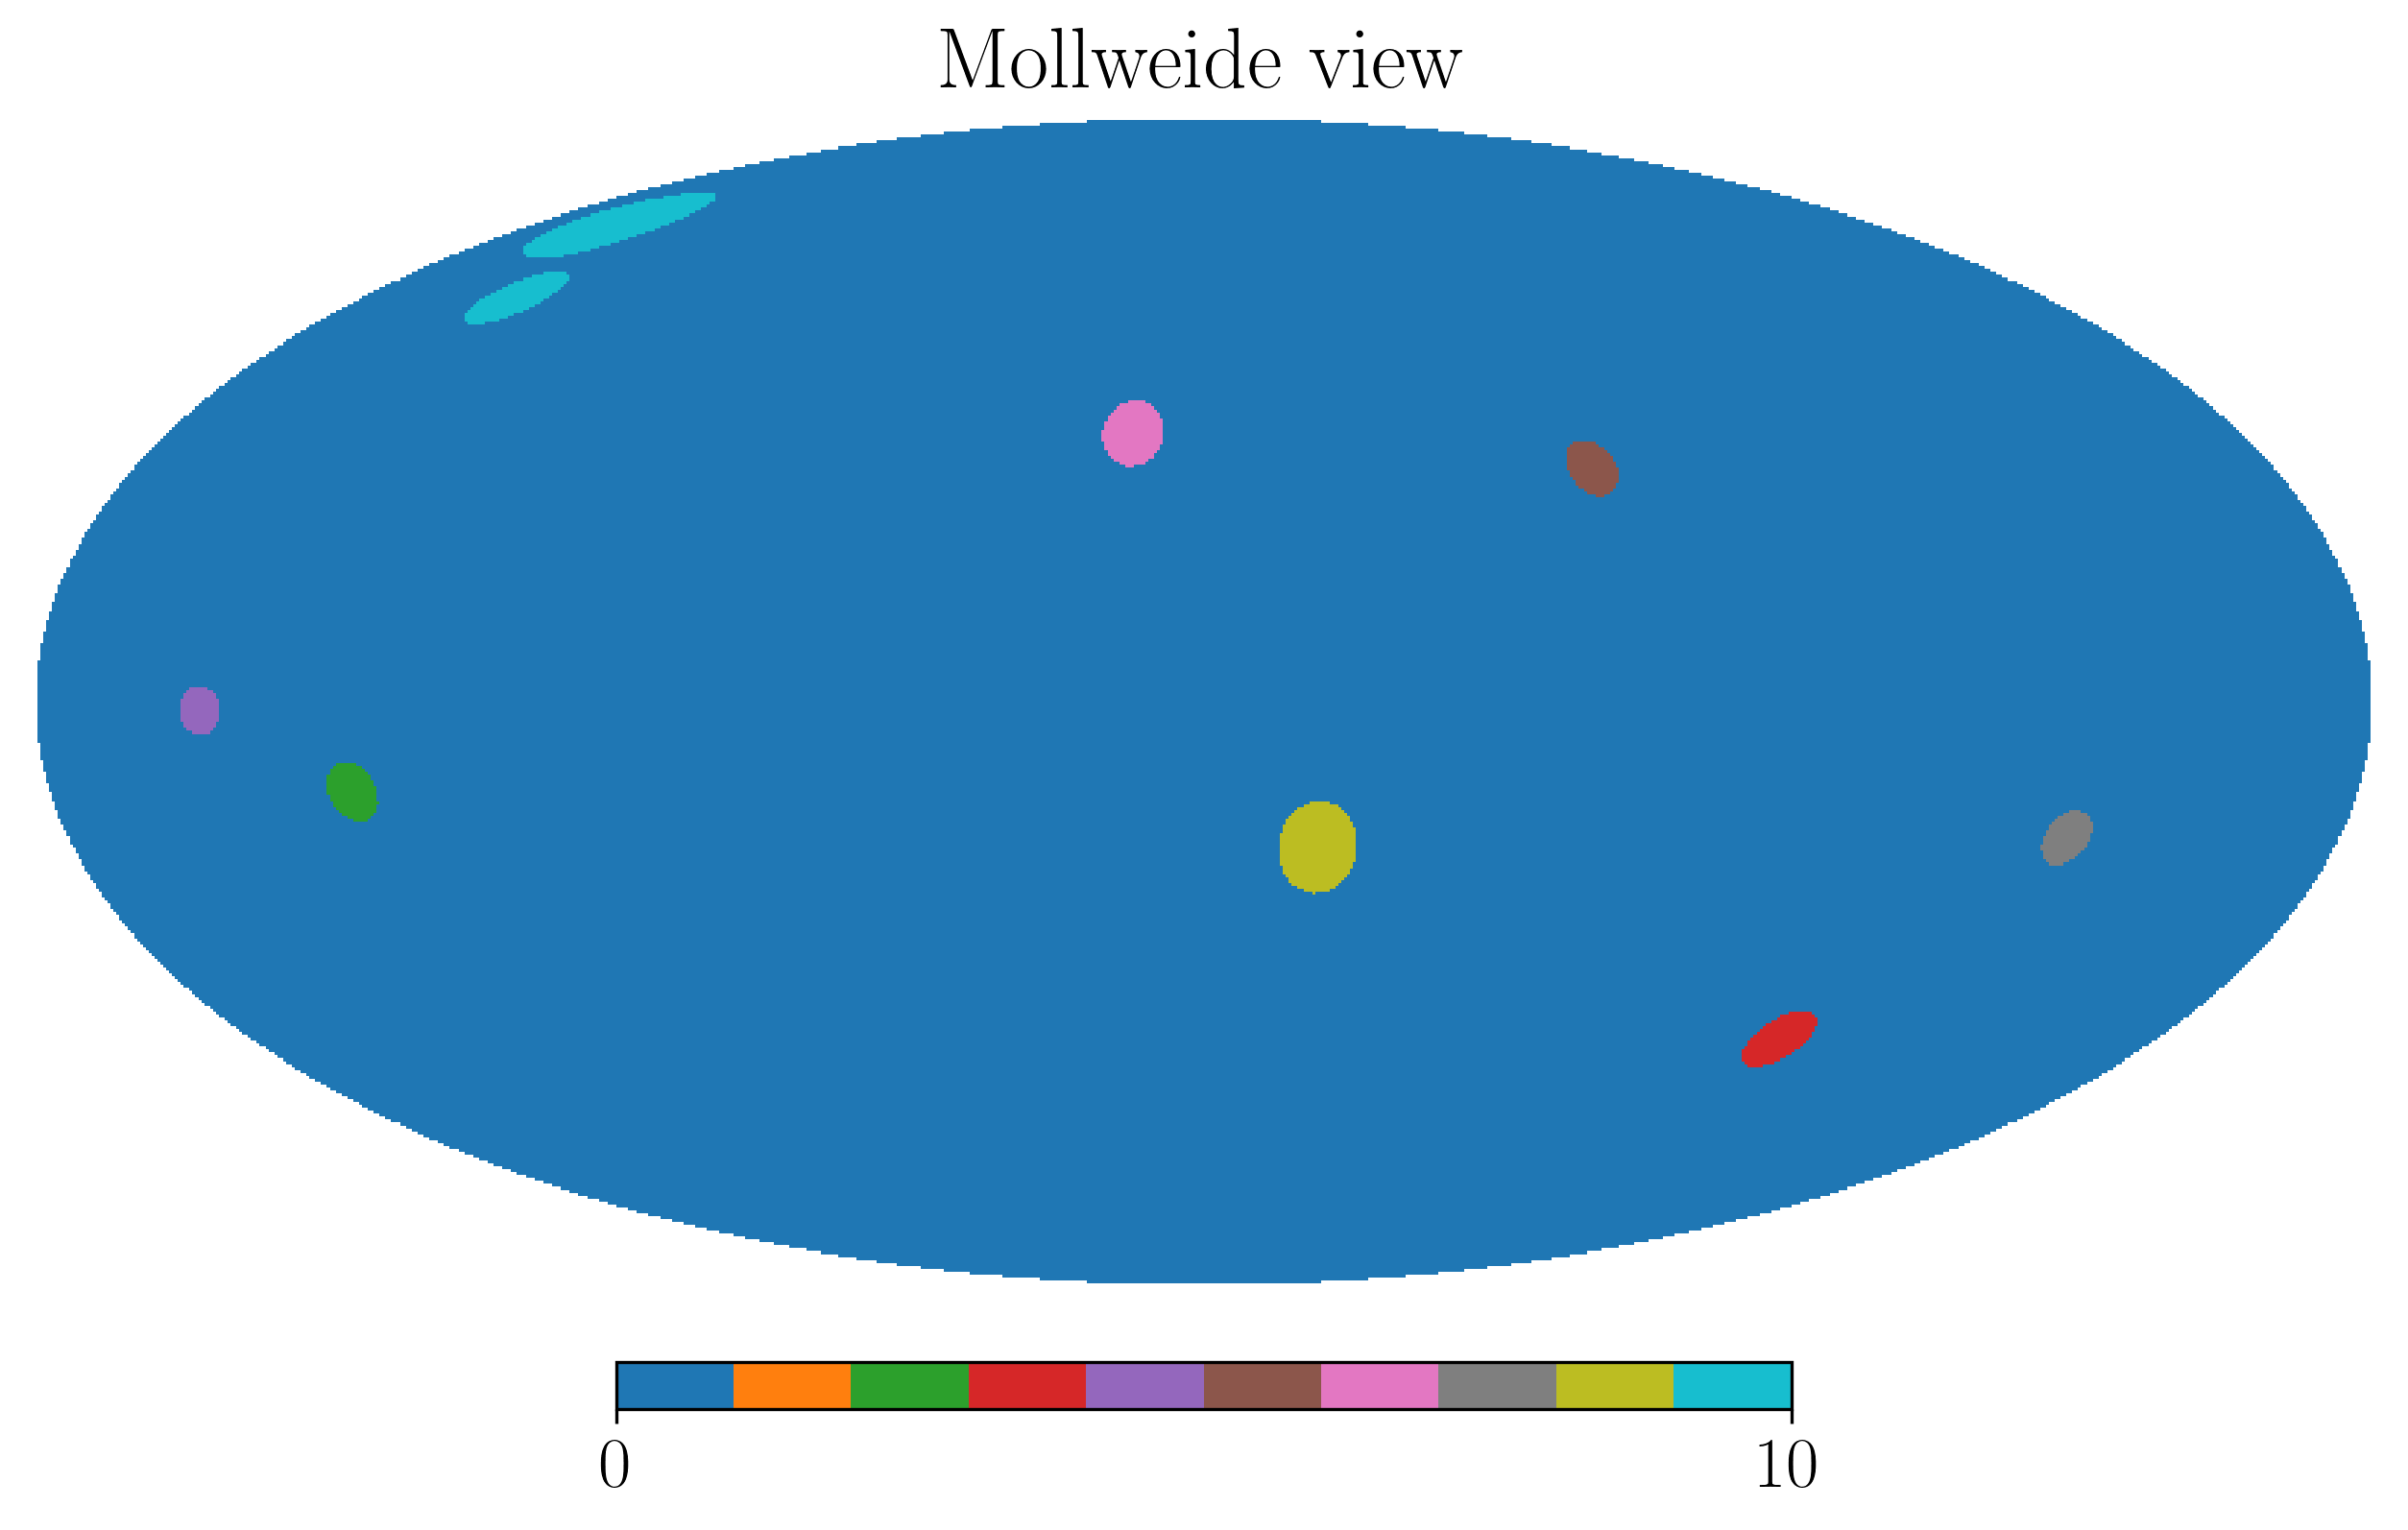

In [27]:
canvas.cmap = cm.tab10
canvas.show_map()

The `stack_cutouts` method cuts out patches around halos and stacks them on top of each other. The cutouts are extracted using the `healpy.projector.CartesianProj`.


Checkout the result with canvas.stack


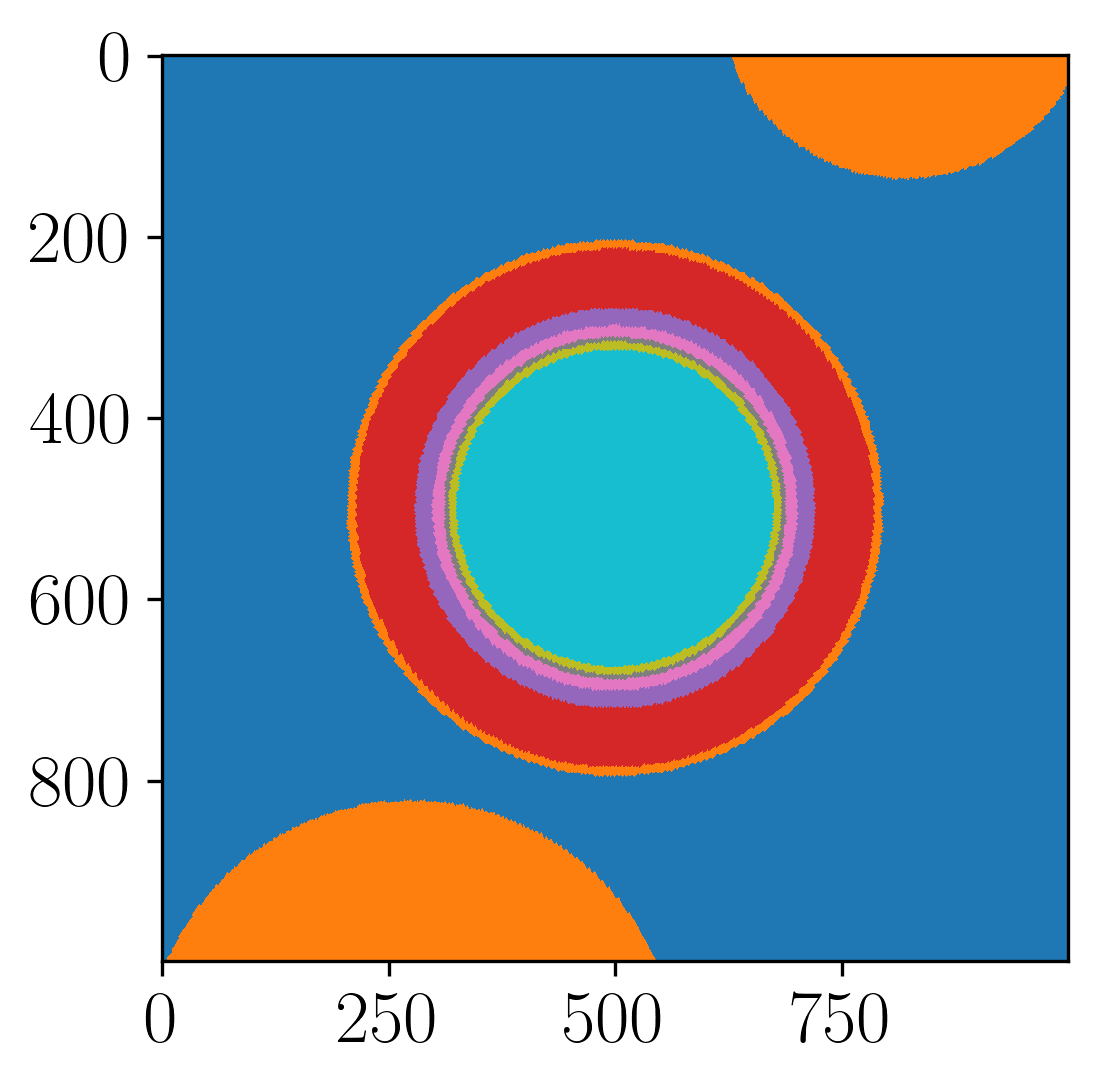

In [30]:
stack = canvas.stack_cutouts(halo_list="all", 
                             lon_range=[-10,10],
                             lat_range=[-10,10],
                             xpix=1000,
                             inplace=False)

plt.imshow(stack, cmap=canvas.cmap)

if you want to see the individual cutouts you can use the `cutouts` generator.


In [32]:
n_cutouts = 5
stack_generator = canvas.cutouts(halo_list=range(n_cutouts),
                                 lon_range=[-10,10],
                                 lat_range=[-10,10],
                                 xpix=1000)

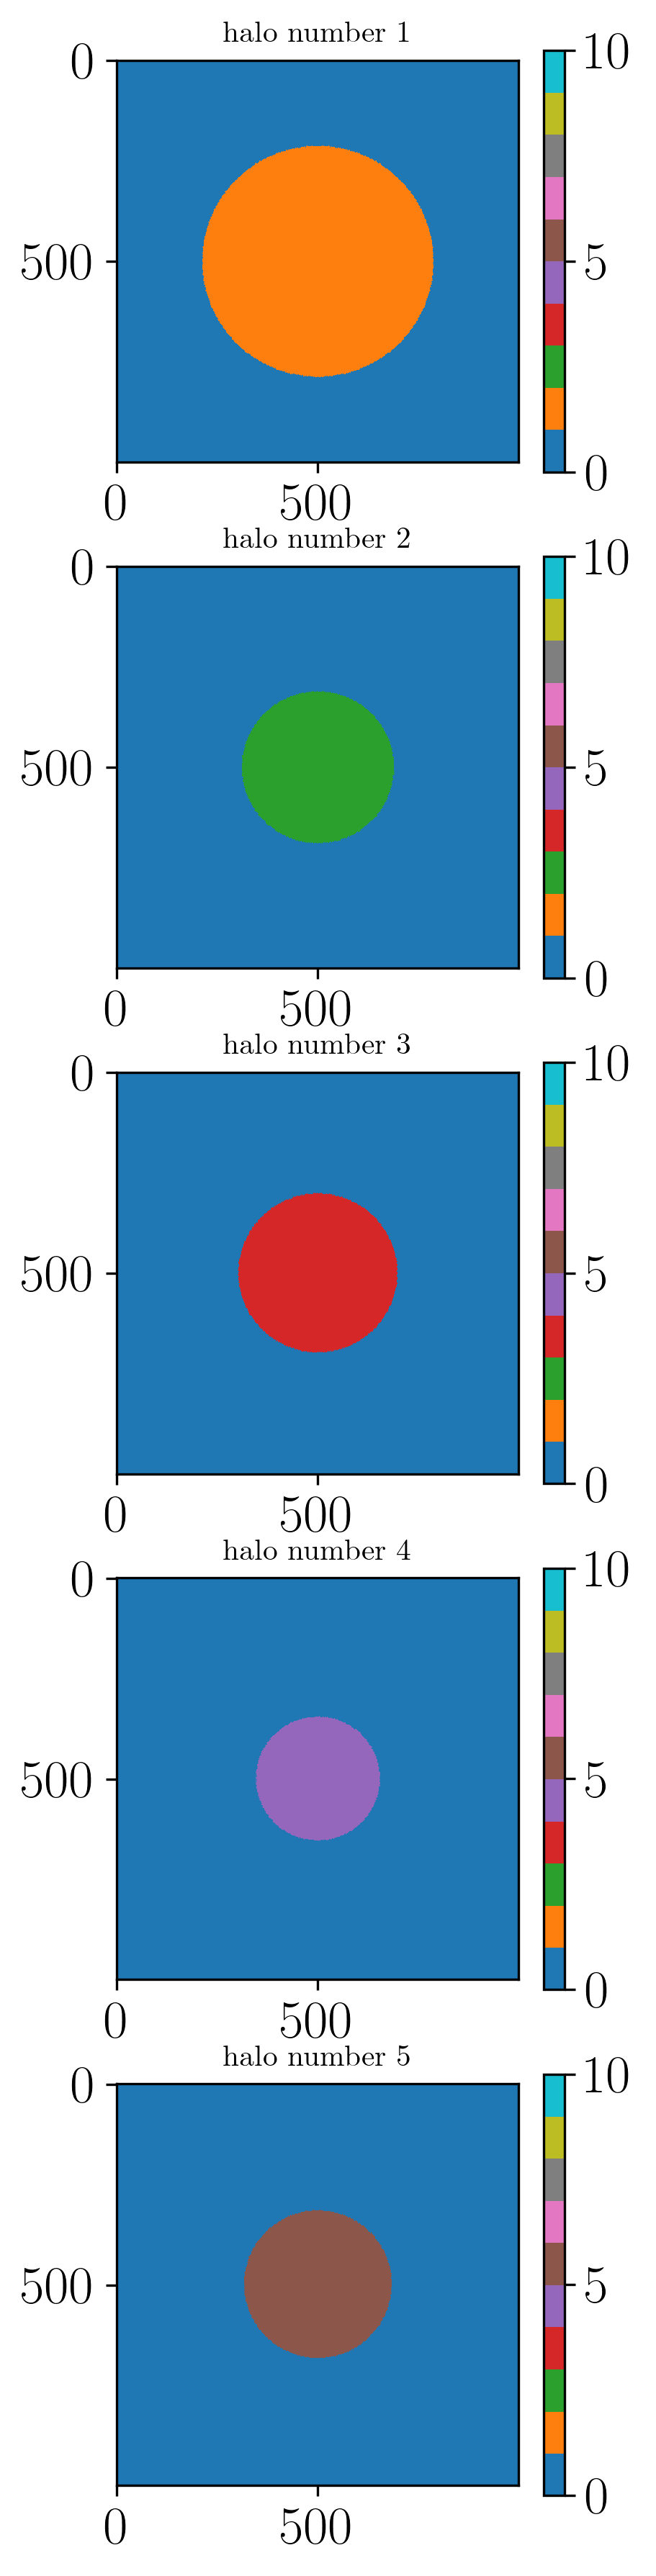

In [33]:
vmin = 0
vmax = canvas.pixels.max()
fig, ax = plt.subplots(n_cutouts, 1, figsize=(3,n_cutouts*3))
for i, cutout in enumerate(stack_generator):
    
    ax[i].set_title(f"halo number {i+1}", fontsize=10)
    im = ax[i].imshow(cutout, vmin=0,vmax=vmax,cmap=canvas.cmap)
    fig.colorbar(im, ax=ax[i])

*Voila!*

# kinetic Sunyaev Zeldovich (in progress...)

Now let's try to make a more realistic map. We will generate a larger catalog and then paint the kSZ signal over the halos. 

In [34]:
catalog = Catalog()
catalog.generate_random_box(n_tot=50000,
                            box_size=30,
                            mass_min=1E14,
                            mass_max=1E15,
                            put_on_shell=True)

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!
generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [35]:
canvas = Canvas(catalog,
                nside=512)

In [36]:
kSZ_painter = Painter(template=profile.kSZ_T_NFW)
kSZ_painter.spray(canvas, with_ray=False)

The template 'kSZ_T_NFW' takes in the following arguments:
['r', 'rho_s', 'R_s', 'v_r']
and the following keyword-only arguments:
['T_cmb']
Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['R_s', 'rho_s', 'v_r'], dtype='object')



Your artwork is finished. Check it out with Canvas.show_map()


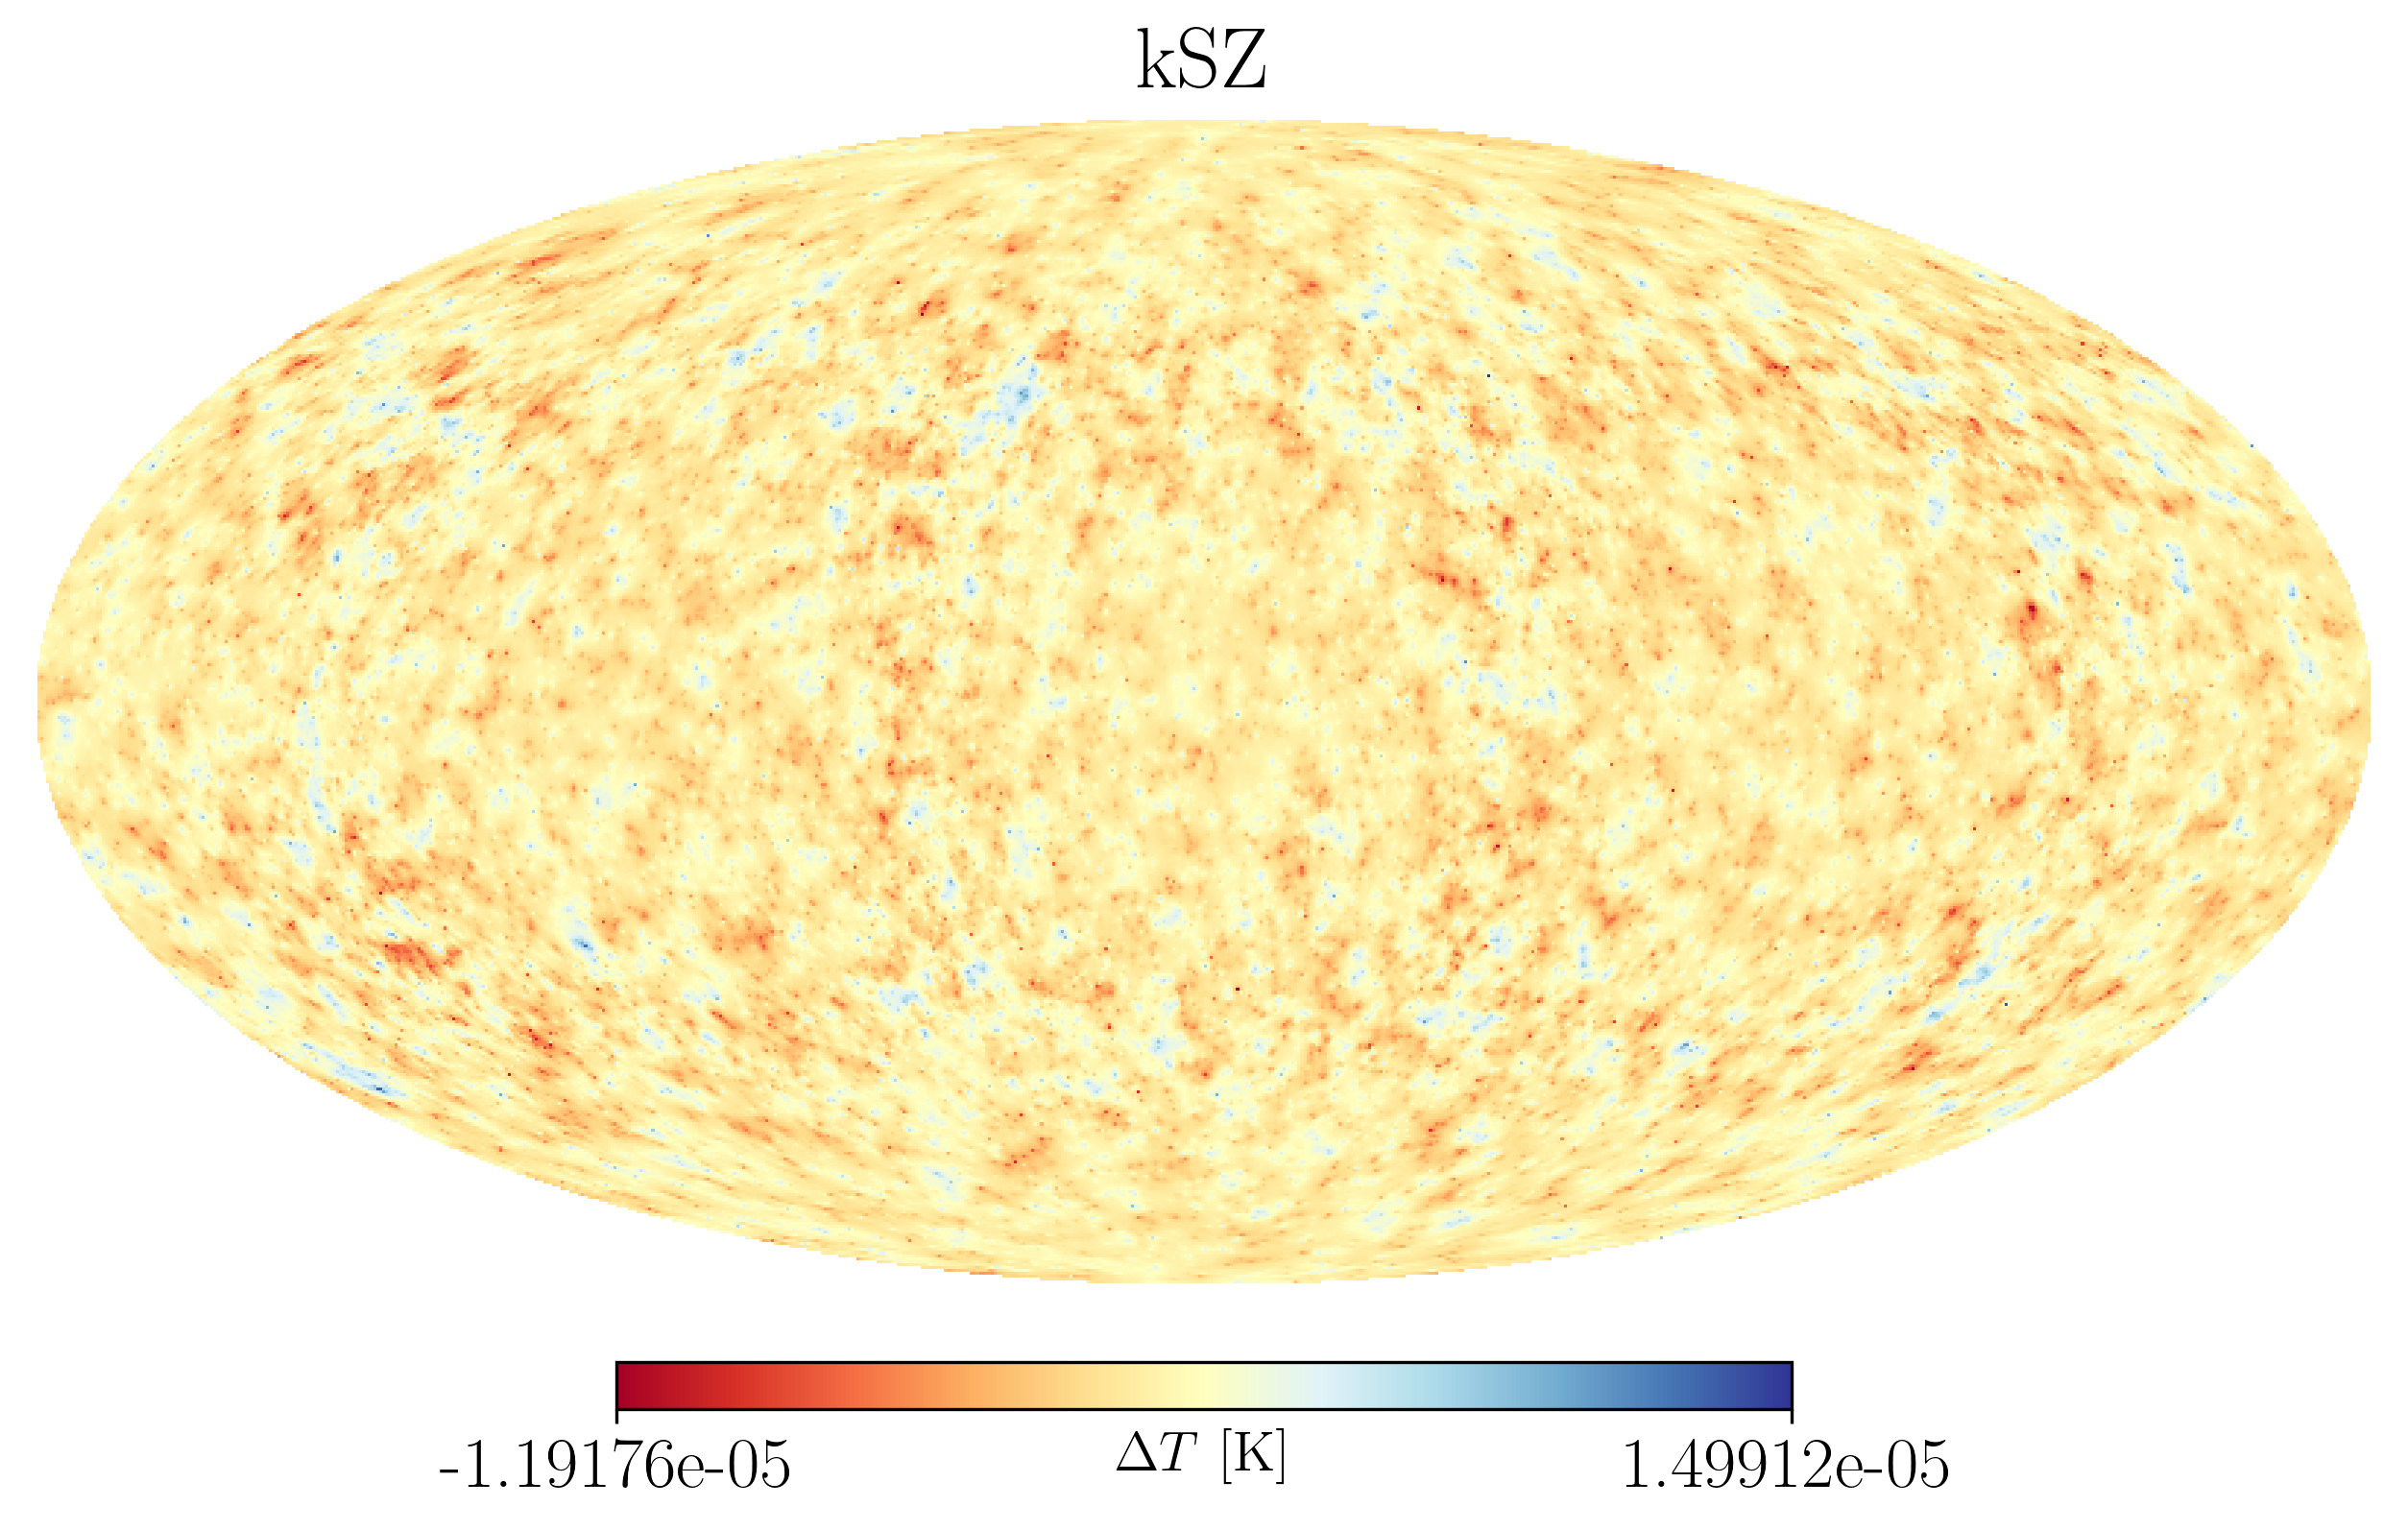

In [39]:
canvas.cmap = cm.RdYlBu
canvas.show_map(title="kSZ",
                unit="$\Delta T$ [K]")

# Birkinshaw-Gull (in progress...)

In [46]:
catalog = Catalog("websky")
catalog.cut_lon_lat(lon_range=[0,10],lat_range=[0,10])

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!
Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


You can also paint signals around the halos that are not axially symmetric. In order to paint asymmetric profiles you should write the profile in terms of $\vec{r}$ (vector pointing from the center of the halo to the pixel) and pass `r_vec` as the first argument instead of `r`. 

In [51]:
canvas = Canvas(catalog,
                nside=2048,
                R_times=10)


In [52]:
painter = Painter(profile.BG_NFW)


The template 'BG_NFW' takes in the following arguments:
['r_vec', 'c_200c', 'R_200c', 'M_200c', 'theta', 'phi', 'v_th', 'v_ph']
and the following keyword-only arguments:
['T_cmb']


In [53]:
painter.spray(canvas, with_ray=False)

Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['M_200c', 'v_ph', 'phi', 'theta', 'v_th', 'c_200c', 'R_200c'], dtype='object')



Your artwork is finished. Check it out with Canvas.show_map()


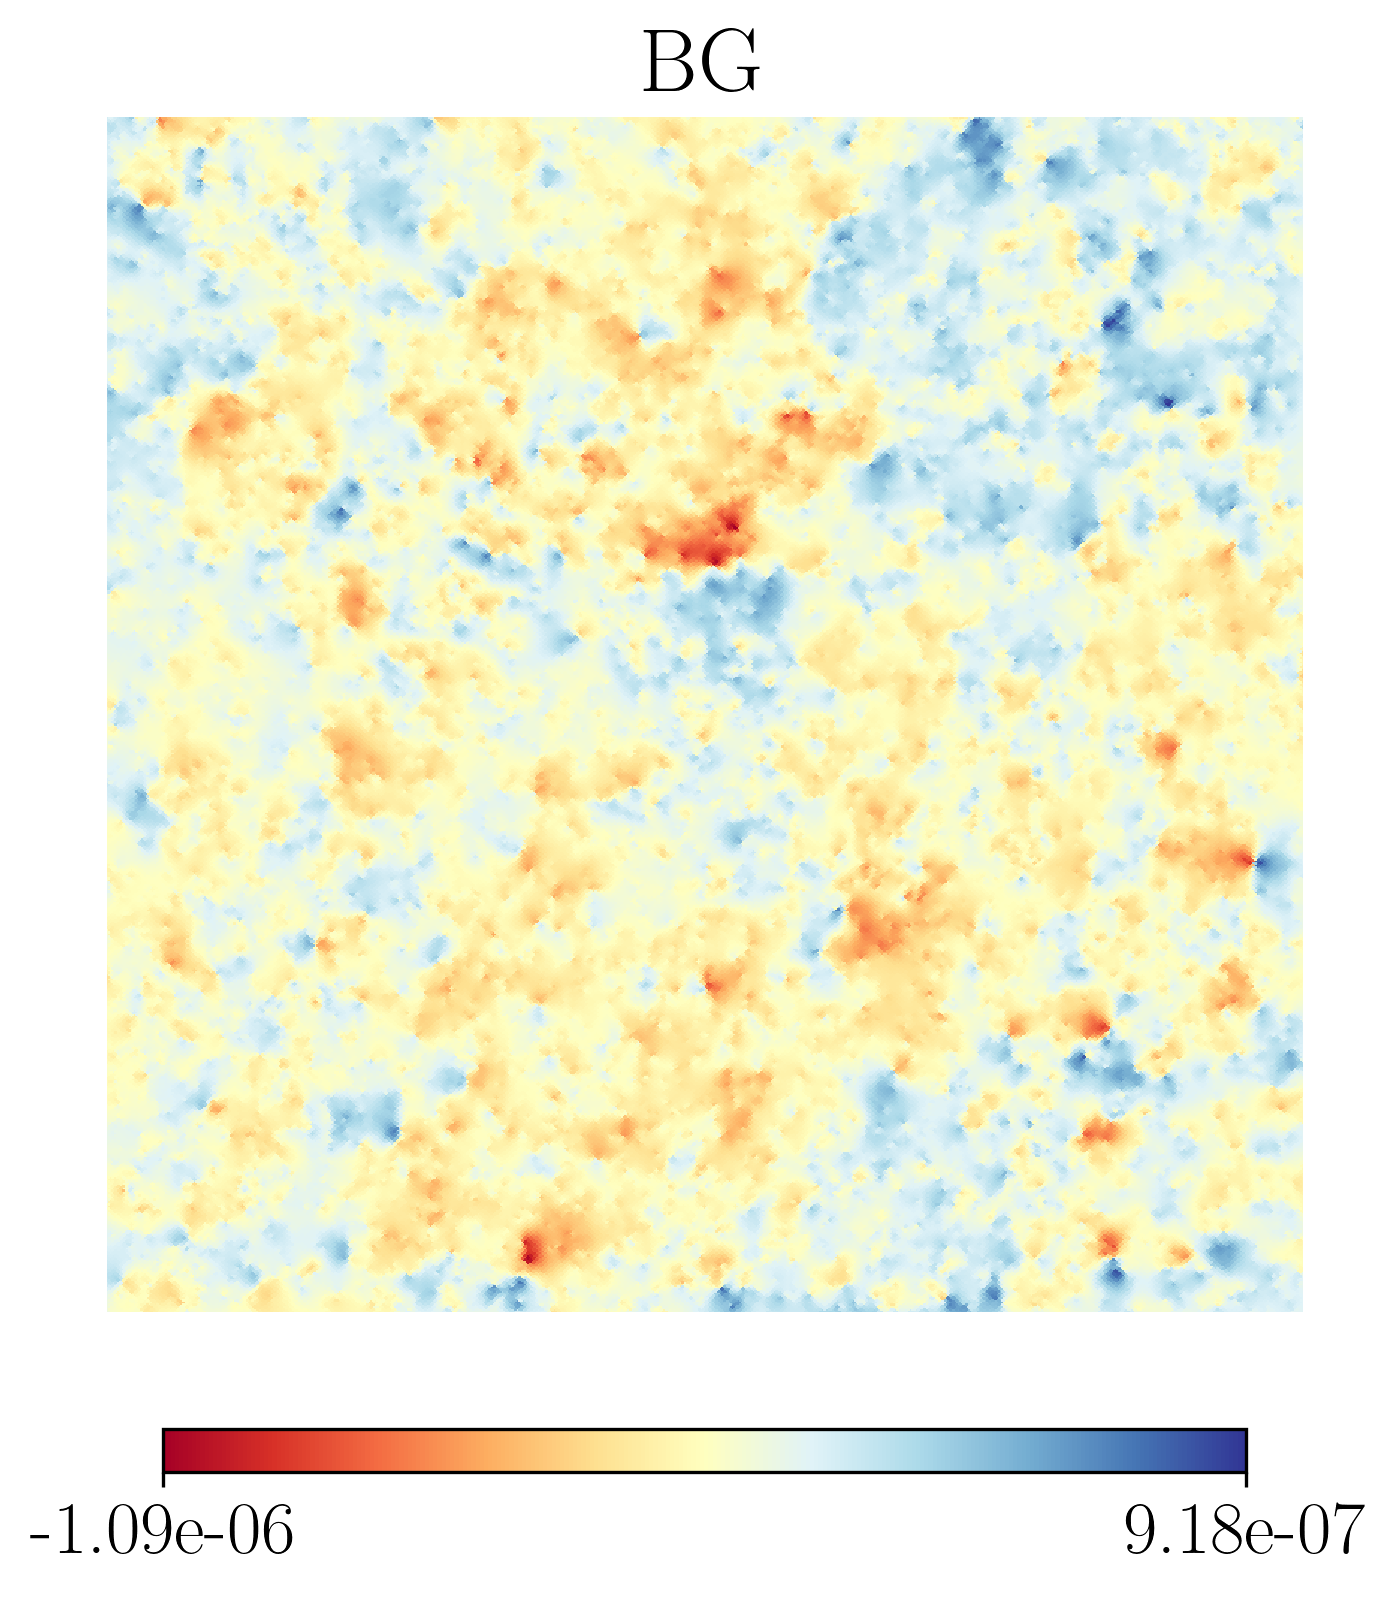

In [54]:
canvas.cmap = cm.RdYlBu
canvas.show_map("cartview",
                lonra=[0,10],
                latra=[0,10],
                title="BG")